<a href="https://colab.research.google.com/github/TeneikaAskew/Formula1/blob/main/Clicked_Formula_1_Feature_Engineering_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Shared drives/Projects/Clicked/F1'

Mounted at /content/drive
/content/drive/Shared drives/Projects/Clicked/F1


Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Basic Information:**
Overview of the dataset columns and rows, including both numerical and categorical data types.

**Summary Statistics:**
Describe method provides insights into the central tendency, dispersion, and shape of the datasets distribution.

**Missing Values:**
Checks missing values in columns.

**Numerical Feature Distribution:**
Shows the distribution of a numerical column to helps understand the amount of data included in the dataset.

**Categorical Feature Distribution:**
Shows the distribution of a column to helps understand the amount of data included in the dataset.

# Feature Engineering

In [ ]:
# @title
# Load the datasets
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stop_times = pd.read_csv('pit_stops.csv')
driver_standings = pd.read_csv('driver_standings.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructors = pd.read_csv('constructors.csv')

# Display the first few rows of each dataframe to understand their structure
print(results.head())
print(races.head())
print(drivers.head())
print(constructors.head())

   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3 

In [ ]:
# # Display the first few rows of each dataframe to understand their structure
# results

In [ ]:
# races

In [ ]:
# drivers

In [ ]:
# constructors

In [ ]:
# # @title
# # Display column names for each dataframe
# print("\nResults Columns:", results.columns)
# print("\nRaces Columns:", races.columns)
# print("\nDrivers Columns:", drivers.columns)
# print("\nConstructors Columns:", constructors.columns)

In [ ]:
# prompt: clear all variables
# %reset -f

In [ ]:
# # @title
# # Add prefixes to column names to avoid conflicts
# results = results.add_prefix('results_')
# races = races.add_prefix('races_')
# drivers = drivers.add_prefix('drivers_')
# constructors = constructors.add_prefix('constructors_')

# # Remove the prefixes from the keys
# results.rename(columns={'results_raceId': 'raceId', 'results_driverId': 'driverId', 'results_constructorId': 'constructorId'}, inplace=True)
# races.rename(columns={'races_raceId': 'raceId'}, inplace=True)
# drivers.rename(columns={'drivers_driverId': 'driverId'}, inplace=True)
# constructors.rename(columns={'constructors_constructorId': 'constructorId'}, inplace=True)

# # Merge the results dataframe with the races dataframe on 'raceId'
# df_merged = results.merge(races, on='raceId', how='left')

# # Merge the resulting dataframe with the drivers dataframe on 'driverId'
# df_merged = df_merged.merge(drivers, on='driverId', how='left')

# # Merge the resulting dataframe with the constructors dataframe on 'constructorId'
# df_merged = df_merged.merge(constructors, on='constructorId', how='left')

# # Display the first few rows of the merged dataframe
# print("\nMerged DataFrame:")
# print(df_merged.head())
# df_merged

In [ ]:
# # create fields

# drivers_dob 	age

# races_ milliseconds
# time
# results_fastest LapTime
# results_fastestLapSpeed #mph
# fp1_date
# fp1_time
# fp2_time
# fp3_time
# quali_time
# sprint_time
# #Convert the `time` and `duration` columns from string format to numerical formats

In [ ]:
# df_merged.head()

In [ ]:
# df_merged.info()

In [ ]:
# df_merged

In [ ]:
# # @title
# # Check for duplicates
# duplicates = df_merged.duplicated()
# print(f'\nDuplicates in the merged dataframe: {duplicates.sum()}')

# # Drop duplicates if any
# df_merged = df_merged.drop_duplicates()

# # Check for missing values in the merged dataframe
# missing_values_merged = df_merged.isnull().sum()
# print("\nMissing Values in Merged DataFrame:")
# print(missing_values_merged[missing_values_merged > 0])

# # Handle missing values (Example: Fill missing values with mean for numerical columns)
# #df_merged = df_merged.fillna(df_merged.mean())

## One Hot Encoding

In [ ]:
# # Encoding Categorical Variables (Example: One-hot encoding for new categorical columns)
# categorical_columns_new = df_merged.select_dtypes(include=['object']).columns
# df_encoded = pd.get_dummies(df_merged, columns=categorical_columns_new)

# # Feature Scaling (Example: Standard scaling for all numerical columns)
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# numerical_columns_new = df_encoded.select_dtypes(include=['float64', 'int64']).columns
# df_encoded[numerical_columns_new] = scaler.fit_transform(df_encoded[numerical_columns_new])

# # Display the first few rows of the final dataframe
# print("\nFinal DataFrame for Machine Learning:")
# print(df_encoded.head())
# print(f"\nFinal DataFrame Shape: {df_encoded.shape}")


In [ ]:
# results

In [ ]:
# df_merged.info()

# Machine Learning

## Driver Placing in Top 10

### Decision Tree
Will position be within the top 10?

<ipython-input-109-7b82661a25a2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finished_results['top_10'] = finished_results['positionOrder'] <= 10


Accuracy: 0.9507042253521126
Confusion Matrix:
[[1476   86]
 [  54 1224]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.94      0.95      1562
        True       0.93      0.96      0.95      1278

    accuracy                           0.95      2840
   macro avg       0.95      0.95      0.95      2840
weighted avg       0.95      0.95      0.95      2840

|--- qualifying_position_x_race_position <= 131.00
|   |--- grid <= 0.50
|   |   |--- avg_position_per_season <= 12.86
|   |   |   |--- avg_team_points <= 14.77
|   |   |   |   |--- avg_position_per_season <= 12.60
|   |   |   |   |   |--- class: False
|   |   |   |   |--- avg_position_per_season >  12.60
|   |   |   |   |   |--- class: True
|   |   |   |--- avg_team_points >  14.77
|   |   |   |   |--- avg_team_points <= 22.65
|   |   |   |   |   |--- class: True
|   |   |   |   |--- avg_team_points >  22.65
|   |   |   |   |   |--- class: False
|   |   |--- avg_positi

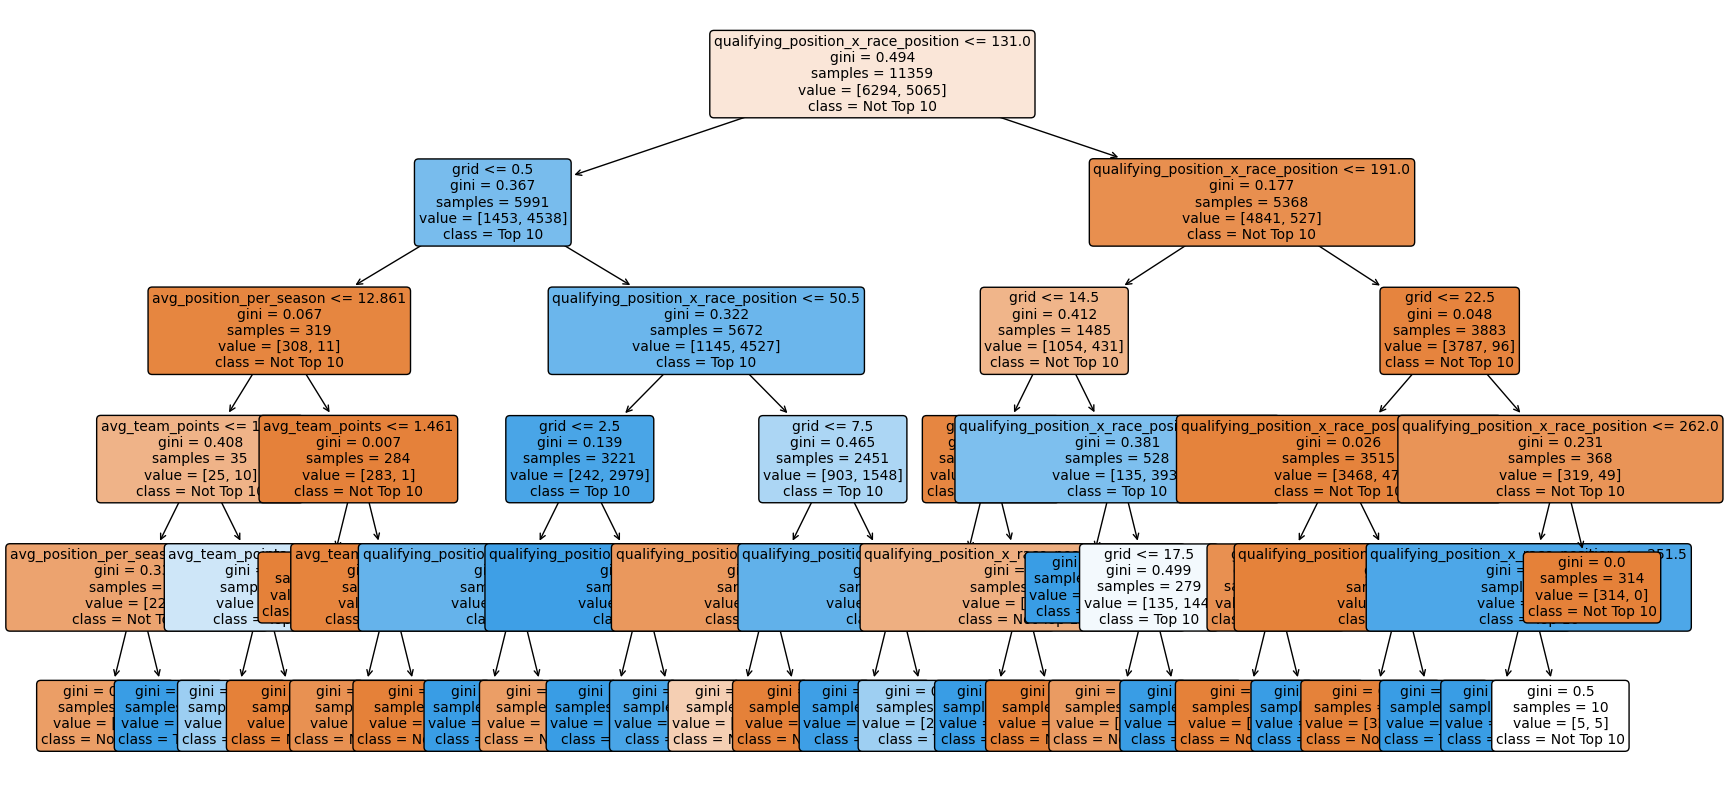

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the datasets
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stop_times = pd.read_csv('pit_stops.csv')
driver_standings = pd.read_csv('driver_standings.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')
constructor_results = pd.read_csv('constructor_results.csv')

# Identify drivers who finished the races
finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
finished_results = results[results['statusId'].isin(finished_status_ids)]

# Identify drivers who finished in the top 10 positions
finished_results['top_10'] = finished_results['positionOrder'] <= 10

# Merge races and results to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']

# Ensure the target variable exists
results['top_10'] = results['positionOrder'] <= 10

# Define features and target
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
target = results['top_10']

# Drop any rows with missing values
features = features.dropna()
target = target[features.index]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
dt_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Print the decision tree
tree_rules = export_text(dt_model, feature_names=list(features.columns))
print(tree_rules)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=list(features.columns), class_names=['Not Top 10', 'Top 10'], filled=True, rounded=True, fontsize=10)
plt.show()


##### Test

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier, export_text
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Load the datasets
# drivers = pd.read_csv('drivers.csv')
# qualifying = pd.read_csv('qualifying.csv')
# races = pd.read_csv('races.csv')
# lap_times = pd.read_csv('lap_times.csv')
# pit_stop_times = pd.read_csv('pit_stops.csv')
# driver_standings = pd.read_csv('driver_standings.csv')
# results = pd.read_csv('results.csv')
# status = pd.read_csv('status.csv')
# constructor_results = pd.read_csv('constructor_standings.csv')

# # Identify drivers who finished the races
# finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
# finished_results = results[results['statusId'].isin(finished_status_ids)]

# # Identify drivers who finished in the top 10 positions
# finished_results['top_10'] = finished_results['positionOrder'] <= 10

# # Merge races and results to get race year
# results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# # Calculate average position per season for each driver
# seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
# seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# # Function to convert time
# def convert_time(time_str):
#     try:
#         if time_str == '\\N':
#             return 999 * 60 + 59.999
#         mins, secs = time_str.split(':')
#         return int(mins) * 60 + float(secs)
#     except:
#         return 999 * 60 + 59.999

# # Calculate average qualifying position for each driver
# qualifying['q1'] = qualifying['q1'].fillna('999:59.999').apply(convert_time)
# qualifying['q2'] = qualifying['q2'].fillna('999:59.999').apply(convert_time)
# qualifying['q3'] = qualifying['q3'].fillna('999:59.999').apply(convert_time)
# qualifying['qualifying_time'] = (
#     qualifying['q1'] + qualifying['q2'] + qualifying['q3']
# ) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
# avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
# avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# # Calculate average team points
# avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
# avg_team_points.columns = ['constructorId', 'avg_team_points']

# # Merge all performance metrics into results dataframe
# results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
# results = results.merge(avg_qualifying_position, on='driverId', how='left')
# results = results.merge(avg_team_points, on='constructorId', how='left')

# # Create interaction features
# results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
# results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']

# # Ensure the target variable exists
# results['top_10'] = results['positionOrder'] <= 10

# # Define features and target
# features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
# target = results['top_10']

# # Drop any rows with missing values
# features = features.dropna()
# target = target[features.index]

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Initialize the Decision Tree model
# dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# # Train the model
# dt_model.fit(X_train, y_train)

# # Predict and evaluate the model
# y_pred = dt_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# # Print the decision tree
# tree_rules = export_text(dt_model, feature_names=list(features.columns))

# # Visualize the decision tree
# plt.figure(figsize=(20,10))
# plot_tree(dt_model, feature_names=list(features.columns), class_names=['Not Top 10', 'Top 10'], filled=True, rounded=True, fontsize=10)
# plt.show()

# # accuracy, conf_matrix, class_report, tree_rules

# print(f'Accuracy: {accuracy}')
# print('Confusion Matrix:')
# print(conf_matrix)
# print('Classification Report:')
# print(class_report)

# # Print the decision tree
# print(tree_rules)


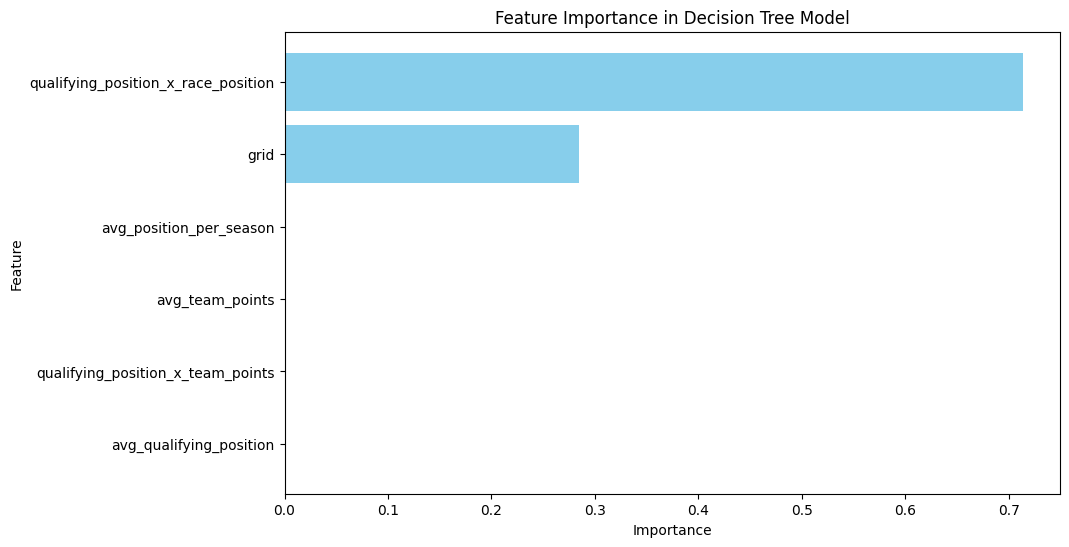

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the decision tree model
feature_importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
drivers['surname']

0        Hamilton
1        Heidfeld
2         Rosberg
3          Alonso
4      Kovalainen
          ...    
854      de Vries
855       Piastri
856      Sargeant
857        Lawson
858       Bearman
Name: surname, Length: 859, dtype: object

### Prediction

In [ ]:
# Find driver ID
driver_name = 'Hamilton'
driver_id = drivers[drivers['surname'] == driver_name]['driverId'].values[0]
driver_id

1

In [ ]:
# Calculate average starting grid position
avg_grid = results[results['driverId'] == driver_id]['grid'].mean()
#print(avg_grid)

# Calculate average finishing position per season
avg_position_per_season = results[results['driverId'] == driver_id]['positionOrder'].mean()
#print(avg_position_per_season)

# Calculate average qualifying position
avg_qualifying_position = qualifying[qualifying['driverId'] == driver_id]['position'].mean()
#print(avg_qualifying_position)

# Calculate the team points for the team the driver is currently in
current_team_id = results[results['driverId'] == driver_id]['constructorId'].values[-1]
avg_team_points = constructor_results[constructor_results['constructorId'] == current_team_id]['points'].mean()
#print(avg_team_points)

# Calculate interaction features
qualifying_position_x_race_position = avg_grid * avg_position_per_season
qualifying_position_x_team_points = avg_grid * avg_team_points
#print(qualifying_position_x_race_position, qualifying_position_x_team_points)

# Compile feature values into a DataFrame
driver_features = pd.DataFrame([{
    'grid': avg_grid,
    'avg_position_per_season': avg_position_per_season,
    'avg_team_points': avg_team_points,
    'avg_qualifying_position': avg_qualifying_position,
    'qualifying_position_x_race_position': qualifying_position_x_race_position,
    'qualifying_position_x_team_points': qualifying_position_x_team_points
}])

print(driver_features)

# Make the prediction
driver_prediction = dt_model.predict(driver_features)

driver_prediction


       grid  avg_position_per_season  avg_team_points  \
0  4.139053                 4.964497        25.388502   

   avg_qualifying_position  qualifying_position_x_race_position  \
0                 3.866864                            20.548318   

   qualifying_position_x_team_points  
0                         105.084361  


array([ True])

#### Stress Test

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, features, target, cv=5, scoring='accuracy')
cv_scores_mean = cv_scores.mean()

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean()}')


Cross-Validation Scores: [0.93556338 0.95035211 0.95492958 0.95387324 0.93554068]
Average Cross-Validation Score: 0.9460517986396717


In [ ]:
# Split the data with different test sizes
test_sizes = [0.1, 0.3, 0.4]
train_test_accuracies = {}
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Size: {test_size}, Accuracy: {accuracy}')
    train_test_accuracies[test_size] = accuracy


Test Size: 0.1, Accuracy: 0.95
Test Size: 0.3, Accuracy: 0.9476525821596244
Test Size: 0.4, Accuracy: 0.9448943661971831


In [ ]:
import numpy as np

# Add noise to the features
features_noisy = features.copy()
noise = np.random.normal(0, 0.1, features.shape)
features_noisy += noise

# Split the noisy data
X_train, X_test, y_train, y_test = train_test_split(features_noisy, target, test_size=0.2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_noisy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Noisy Data: {accuracy_noisy}')


Accuracy with Noisy Data: 0.9503521126760563


In [ ]:
# Adversarial example by reversing the grid position
features_adv = features.copy()
features_adv['grid'] = features['grid'].max() - features['grid']

# Split the adversarial data
X_train, X_test, y_train, y_test = train_test_split(features_adv, target, test_size=0.2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_adv = accuracy_score(y_test, y_pred)
print(f'Accuracy with Adversarial Data: {accuracy_adv}')

Accuracy with Adversarial Data: 0.9507042253521126


In [ ]:
(cv_scores, cv_scores_mean, train_test_accuracies, accuracy_noisy, accuracy_adv)

(array([0.93556338, 0.95035211, 0.95492958, 0.95387324, 0.93554068]),
 0.9460517986396717,
 {0.1: 0.95, 0.3: 0.9476525821596244, 0.4: 0.9448943661971831},
 0.9503521126760563,
 0.9507042253521126)

### Monaco Prediction

Filter for driver and race if not Monaco or Hamilton

In [ ]:
monaco_circuit_ids = [races[races['name'].str.contains('Monaco', case=False)]['raceId'].values]
monaco_circuit_ids

[array([   6,   23,   40,   59,   76,   95,  114,  130,  147,  164,  178,
         196,  211,  229,  244,  260,  278,  294,  308,  324,  342,  358,
         374,  391,  407,  423,  441,  456,  472,  488,  503,  518,  531,
         548,  565,  580,  595,  610,  623,  634,  645,  658,  669,  680,
         690,  700,  709,  719,  730,  738,  747,  756,  766,  777,  785,
         793,  834,  846,  865,  885,  905,  931,  953,  974,  994, 1015,
        1056, 1080, 1104, 1128])]

In [ ]:
# prompt: street_results = results[results['raceId'].isin(street_circuit_ids)]
monaco_results = results.merge(races, on='raceId', how='left')
monaco_results = monaco_results[monaco_results['name'].str.contains('Monaco', case=False)]
monaco_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
108,109,23,1,1,22,3,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
109,110,23,9,2,4,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
110,111,23,13,6,2,1,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
111,112,23,17,9,10,9,4,4,4,5.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
112,113,23,20,5,15,19,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25955,25961,1104,815,9,11,20,16,16,16,0.0,...,2023-05-26,11:30:00,2023-05-26,15:00:00,2023-05-27,10:30:00,2023-05-27,14:00:00,\N,\N
25956,25962,1104,807,210,27,18,17,17,17,0.0,...,2023-05-26,11:30:00,2023-05-26,15:00:00,2023-05-27,10:30:00,2023-05-27,14:00:00,\N,\N
25957,25963,1104,858,3,2,16,18,18,18,0.0,...,2023-05-26,11:30:00,2023-05-26,15:00:00,2023-05-27,10:30:00,2023-05-27,14:00:00,\N,\N
25958,25964,1104,825,210,20,17,\N,R,19,0.0,...,2023-05-26,11:30:00,2023-05-26,15:00:00,2023-05-27,10:30:00,2023-05-27,14:00:00,\N,\N


In [ ]:
# prompt: street_qualifying = qualifying[qualifying['raceId'].isin(street_circuit_ids)] make sure this is correct - its not returning any records
monaco_qualifying = qualifying[qualifying['raceId'].isin(monaco_circuit_ids[0])]
monaco_qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,qualifying_time
108,109,23,13,6,2,1,75.190,75.110,75.787,75.362333
109,110,23,8,6,1,2,75.717,75.404,75.815,75.645333
110,111,23,1,1,22,3,75.582,75.322,75.839,75.581000
111,112,23,5,1,23,4,75.295,75.389,76.165,75.616333
112,113,23,9,2,4,5,75.977,75.483,76.171,75.877000
...,...,...,...,...,...,...,...,...,...,...
9690,9748,1104,858,3,2,16,73.113,59999.999,59999.999,40024.370333
9691,9749,1104,825,210,20,17,73.270,59999.999,59999.999,40024.422667
9692,9750,1104,807,210,27,18,73.279,59999.999,59999.999,40024.425667
9693,9751,1104,855,51,24,19,73.523,59999.999,59999.999,40024.507000


In [ ]:
# prompt: driver_results_street = street_results[street_results['driverId'] == driver_id]
#driver_id == 1
driver_results_monaco = monaco_results[monaco_results['driverId'] == driver_id]
driver_results_monaco

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
108,109,23,1,1,22,3,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
457,458,40,1,1,2,2,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
7664,7665,6,1,1,1,19,12,12,12,0.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
20444,20447,342,1,1,2,5,5,5,5,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
20899,20902,846,1,1,3,9,6,6,6,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
21353,21356,865,1,1,4,3,5,5,5,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
21822,21825,885,1,131,10,2,4,4,4,12.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
22238,22241,905,1,131,44,2,2,2,2,18.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
22634,22638,931,1,131,44,1,3,3,3,15.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
23022,23027,953,1,131,44,3,1,1,1,25.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
#filter data for driver
driver_qualifying_monaco = monaco_qualifying[monaco_qualifying['driverId'] == driver_id]
driver_qualifying_monaco

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,qualifying_time
110,111,23,1,1,22,3,75.582,75.322,75.839,75.581000
457,458,40,1,1,2,2,75.685,75.479,75.905,75.689667
3099,3101,6,1,1,1,16,76.264,59999.999,59999.999,40025.420667
3448,3450,342,1,1,2,5,75.676,74.527,74.432,74.878333
4659,4662,846,1,1,3,7,75.207,74.275,75.280,74.920667
5086,5089,865,1,1,4,4,76.063,75.166,74.583,75.270667
5550,5553,885,1,131,10,2,83.779,76.265,73.967,78.003667
5992,5995,905,1,131,44,2,77.823,76.354,76.048,76.741667
6382,6405,931,1,131,44,1,76.588,75.864,75.098,75.850000
6772,6795,953,1,131,44,3,74.826,74.056,73.942,74.274667


In [ ]:
# Check if the filtered dataset is empty
(driver_results_monaco.info(), driver_results_monaco.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 108 to 25943
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   resultId                             16 non-null     int64  
 1   raceId                               16 non-null     int64  
 2   driverId                             16 non-null     int64  
 3   constructorId                        16 non-null     int64  
 4   number                               16 non-null     object 
 5   grid                                 16 non-null     int64  
 6   position                             16 non-null     object 
 7   positionText                         16 non-null     object 
 8   positionOrder                        16 non-null     int64  
 9   points                               16 non-null     float64
 10  laps                                 16 non-null     int64  
 11  time_x                            

(None, None)

In [ ]:
# Calculate average starting grid position
avg_grid_monaco = driver_results_monaco['grid'].mean()

# Calculate average finishing position per season
avg_position_per_season_monaco = driver_results_monaco['positionOrder'].mean()

# Calculate average qualifying position
avg_qualifying_position_monaco = driver_qualifying_monaco['position'].mean()

# Calculate the team points for the team the driver is currently in
current_team_id_monaco = driver_results_monaco['constructorId'].values[-1]
avg_team_points_monaco = constructor_results[constructor_results['constructorId'] == current_team_id_monaco]['points'].mean()

# Calculate interaction features
qualifying_position_x_race_position_monaco = avg_grid_monaco * avg_position_per_season_monaco
qualifying_position_x_team_points_monaco = avg_grid_monaco * avg_team_points_monaco

# Compile feature values into a DataFrame
driver_features_monaco = pd.DataFrame([{
    'grid': avg_grid_monaco,
    'avg_position_per_season': avg_position_per_season_monaco,
    'avg_team_points': avg_team_points_monaco,
    'avg_qualifying_position': avg_qualifying_position_monaco,
    'qualifying_position_x_race_position': qualifying_position_x_race_position_monaco,
    'qualifying_position_x_team_points': qualifying_position_x_team_points_monaco
}])
print(driver_features_monaco)

    grid  avg_position_per_season  avg_team_points  avg_qualifying_position  \
0  5.375                   4.4375        25.388502                     5.25   

   qualifying_position_x_race_position  qualifying_position_x_team_points  
0                            23.851562                         136.463197  


In [ ]:
# Define target variables for top 10 and top 3
driver_results_monaco['top_10'] = driver_results_monaco['positionOrder'] <= 10
driver_results_monaco['top_3'] = driver_results_monaco['positionOrder'] <= 3

# Drop any rows with missing values
features_monaco = driver_results_monaco[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
target_top_10 = driver_results_monaco['top_10']
target_top_3 = driver_results_monaco['top_3']

features_monaco = features_monaco.dropna()
target_top_10 = target_top_10[features_monaco.index]
target_top_3 = target_top_3[features_monaco.index]

NameError: name 'driver_results_monaco' is not defined

In [ ]:
# Initialize Decision Tree models for top 10 and top 3
dt_model_top_10 = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model_top_3 = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the models
dt_model_top_10.fit(features_monaco, target_top_10)
dt_model_top_3.fit(features_monaco, target_top_3)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Make predictions for top 10 and top 3 finishes
prediction_top_10 = dt_model_top_10.predict(driver_features_monaco)
prediction_top_3 = dt_model_top_3.predict(driver_features_monaco)

print("Will Lewis Hamilton place top 10:",prediction_top_10, "Will Lewis Hamilton place top 3",prediction_top_3)

Will Lewis Hamilton place top 10: [ True] Will Lewis Hamilton place top 3 [False]


#### Stress Test

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for top 10 and top 3 models
cv_scores_top_10 = cross_val_score(dt_model_top_10, features_street, target_top_10, cv=5, scoring='accuracy')
cv_scores_top_3 = cross_val_score(dt_model_top_3, features_monaco, target_top_3, cv=5, scoring='accuracy')

(cv_scores_top_10, cv_scores_top_3, cv_scores_top_10.mean(), cv_scores_top_3.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(array([0.75, 1.  , 1.  , 1.  , 1.  ]),
 array([0.75      , 1.        , 0.66666667, 0.66666667, 1.        ]),
 0.95,
 0.8166666666666667)

In [ ]:
# Additional Train-Test Splits for top 10 model
test_sizes = [0.1, 0.3, 0.4]
train_test_accuracies_top_10 = {}
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(features_street, target_top_10, test_size=test_size, random_state=42)
    dt_model_top_10.fit(X_train, y_train)
    y_pred = dt_model_top_10.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_test_accuracies_top_10[test_size] = accuracy

# Additional Train-Test Splits for top 3 model
train_test_accuracies_top_3 = {}
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(features_monaco, target_top_3, test_size=test_size, random_state=42)
    dt_model_top_3.fit(X_train, y_train)
    y_pred = dt_model_top_3.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_test_accuracies_top_3[test_size] = accuracy

(train_test_accuracies_top_10, train_test_accuracies_top_3)


({0.1: 1.0, 0.3: 1.0, 0.4: 1.0}, {0.1: 0.5, 0.3: 0.8, 0.4: 0.8571428571428571})

In [ ]:
import numpy as np

# Add noise to the features
features_noisy_top_10 = features_monaco.copy()
noise_top_10 = np.random.normal(0, 0.1, features_monaco.shape)
features_noisy_top_10 += noise_top_10

# Split the noisy data for top 10 model
X_train, X_test, y_train, y_test = train_test_split(features_noisy_top_10, target_top_10, test_size=0.2, random_state=42)
dt_model_top_10.fit(X_train, y_train)
y_pred = dt_model_top_10.predict(X_test)
accuracy_noisy_top_10 = accuracy_score(y_test, y_pred)

# Add noise to the features
features_noisy_top_3 = features_monaco.copy()
noise_top_3 = np.random.normal(0, 0.1, features_monaco.shape)
features_noisy_top_3 += noise_top_3

# Split the noisy data for top 3 model
X_train, X_test, y_train, y_test = train_test_split(features_noisy_top_3, target_top_3, test_size=0.2, random_state=42)
dt_model_top_3.fit(X_train, y_train)
y_pred = dt_model_top_3.predict(X_test)
accuracy_noisy_top_3 = accuracy_score(y_test, y_pred)

(accuracy_noisy_top_10, accuracy_noisy_top_3)


(1.0, 0.75)

## Predicting Multiple Drivers

In [ ]:
# prompt: find these driver id ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Riccardio', 'Alonso']

import pandas as pd

# Load the drivers.csv file
drivers = pd.read_csv('drivers.csv')

# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']
print(len(driver_names))
# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()

# Print the driver IDs
print(driver_ids)
print(len(driver_ids))

10
[1, 4, 50, 708, 815, 817, 830, 832, 844, 846, 847, 857]
12


In [ ]:
# prompt: find the drivers with ids [1, 4, 50, 708, 815, 830, 832, 844, 846, 847, 857]
drivers_with_ids = drivers[drivers['driverId'].isin(driver_ids)]
print(drivers_with_ids)
#drop 50 and 708

     driverId        driverRef number code  forename     surname         dob  \
0           1         hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
3           4           alonso     14  ALO  Fernando      Alonso  1981-07-29   
49         50       verstappen     \N   \N       Jos  Verstappen  1972-03-04   
708       708  duncan_hamilton     \N   \N    Duncan    Hamilton  1920-04-30   
814       815            perez     11  PER    Sergio       Pérez  1990-01-26   
816       817        ricciardo      3  RIC    Daniel   Ricciardo  1989-07-01   
829       830   max_verstappen     33  VER       Max  Verstappen  1997-09-30   
831       832            sainz     55  SAI    Carlos       Sainz  1994-09-01   
842       844          leclerc     16  LEC   Charles     Leclerc  1997-10-16   
844       846           norris      4  NOR     Lando      Norris  1999-11-13   
845       847          russell     63  RUS    George     Russell  1998-02-15   
855       857          piastri     81  P

In [ ]:
# prompt: remove driver id 708 from driver_ids

driver_ids.remove(708) # Remove 708
driver_ids.remove(50)  # Remove 50
print(driver_ids, len(driver_ids))

[1, 4, 815, 817, 830, 832, 844, 846, 847, 857] 10


In [ ]:
driver_name = 'Hamilton'
driver_id = drivers[drivers['surname'] == driver_name]['driverId'].iloc[0]
print(driver_id)

1


In [ ]:
# Print all unique driver surnames to verify correct spelling
print(drivers['surname'].unique())

In [ ]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,avg_position_per_season,avg_qualifying_position,avg_team_points,qualifying_position_x_race_position,qualifying_position_x_team_points,top_3
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,5.222222,3.866864,7.150933,1,7.150933,True
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,6.500000,11.100000,4.338028,10,21.690141,True
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,10.888889,6.834951,4.395152,21,30.766061,True
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,7.444444,8.024390,4.409429,44,48.503722,False
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,7.888889,13.883929,7.150933,15,21.452799,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26394,26400,1126,822,15,77,16,16,16,16,0.0,...,1:32.098,211.548,1,2024,16.666667,7.235808,1.389027,256,22.224439,False
26395,26401,1126,840,117,18,11,17,17,17,0.0,...,1:31.588,212.726,1,2024,13.166667,14.106667,5.820513,187,64.025641,False
26396,26402,1126,848,3,23,14,18,18,18,0.0,...,1:30.849,214.456,1,2024,14.500000,11.767442,4.395152,252,61.532121,False
26397,26403,1126,825,210,20,18,19,19,19,0.0,...,1:31.774,212.295,1,2024,13.666667,13.443787,1.488372,342,26.790698,False


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()
driver_ids.remove(708)  # Remove 708
driver_ids.remove(50)   # Remove 50

# Find all races in Monaco
monaco_circuit_ids = races[races['name'].str.contains('Monaco', case=False)]['raceId'].values

# Merge with results
monaco_results = results.merge(races, on='raceId', how='left')
monaco_results = monaco_results[monaco_results['name'].str.contains('Monaco', case=False)]

# Find Monaco qualifier races
monaco_qualifying = qualifying[qualifying['raceId'].isin(monaco_circuit_ids)]

# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]

# # Ensure the target variable exists
results['top_10'] = results['positionOrder'] <= 10
target_top_10 = results['top_10']
# # Ensure the target variable exists
results['top_3'] = results['positionOrder'] <= 3
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
_, _, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Initialize the Decision Tree models
dt_model_top_10 = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model_top_3 = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the models
dt_model_top_10.fit(X_train, y_train_top_10)
dt_model_top_3.fit(X_train, y_train_top_3)

# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = dt_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = dt_model_top_3.predict(X_test)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)

# Initialize lists to store predictions for Monaco
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for Monaco races
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get driver results for Monaco
    driver_results_monaco = monaco_results[monaco_results['driverId'] == driver_id]

    # Get driver qualifying results
    driver_qualifying_monaco = monaco_qualifying[monaco_qualifying['driverId'] == driver_id]

    # Check if the filtered dataset is empty
    if driver_results_monaco.empty or driver_qualifying_monaco.empty:
        print(f"No results found for driver {driver_name} in Monaco races.")
        continue

    # Calculate average starting grid position
    avg_grid_monaco = driver_results_monaco['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season_monaco = driver_results_monaco['positionOrder'].mean()

    # Calculate average qualifying position
    avg_qualifying_position_monaco = driver_qualifying_monaco['position'].mean()

    # Calculate the team points for the team the driver is currently in
    current_team_id_monaco = driver_results_monaco['constructorId'].values[-1]
    avg_team_points_monaco = constructor_results[constructor_results['constructorId'] == current_team_id_monaco]['points'].mean()

    # Calculate interaction features
    qualifying_position_x_race_position_monaco = avg_grid_monaco * avg_position_per_season_monaco
    qualifying_position_x_team_points_monaco = avg_grid_monaco * avg_team_points_monaco

    # Compile feature values into a DataFrame
    driver_features_monaco = pd.DataFrame([{
        'grid': avg_grid_monaco,
        'avg_position_per_season': avg_position_per_season_monaco,
        'avg_team_points': avg_team_points_monaco,
        'avg_qualifying_position': avg_qualifying_position_monaco,
        'qualifying_position_x_race_position': qualifying_position_x_race_position_monaco,
        'qualifying_position_x_team_points': qualifying_position_x_team_points_monaco
    }])

    # Make predictions for top 10 and top 3 finishes
    prediction_top_10 = dt_model_top_10.predict(driver_features_monaco)[0]
    prediction_top_3 = dt_model_top_3.predict(driver_features_monaco)[0]

    # Store predictions
    predictions_top_10.append((driver_name, prediction_top_10))
    predictions_top_3.append((driver_name, prediction_top_3))

# Print predictions for all drivers
for driver_name, pred_top_10 in predictions_top_10:
    print(f"Will {driver_name} place top 10: {pred_top_10}")
for driver_name, pred_top_3 in predictions_top_3:
    print(f"Will {driver_name} place top 3: {pred_top_3}")


Top 10 Accuracy: 0.9507042253521126
Top 10 Precision: 0.934351145038168
Top 10 Recall: 0.9577464788732394
Top 10 F1 Score: 0.9459041731066461
Top 10 Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.94      0.95      1562
        True       0.93      0.96      0.95      1278

    accuracy                           0.95      2840
   macro avg       0.95      0.95      0.95      2840
weighted avg       0.95      0.95      0.95      2840

Top 3 Accuracy: 0.9929577464788732
Top 3 Precision: 0.9769820971867008
Top 3 Recall: 0.9720101781170484
Top 3 F1 Score: 0.9744897959183674
Top 3 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2447
        True       0.98      0.97      0.97       393

    accuracy                           0.99      2840
   macro avg       0.99      0.98      0.99      2840
weighted avg       0.99      0.99      0.99      2840

Will H

In [ ]:
predictions_top_10

[('Hamilton', 1, True),
 ('Alonso', 4, True),
 ('Pérez', 815, True),
 ('Ricciardo', 817, False),
 ('Verstappen', 830, True),
 ('Sainz', 832, True),
 ('Leclerc', 844, False),
 ('Norris', 846, True),
 ('Russell', 847, True),
 ('Piastri', 857, True)]

In [ ]:
predictions_top_3

[('Hamilton', False),
 ('Alonso', False),
 ('Pérez', False),
 ('Ricciardo', False),
 ('Verstappen', False),
 ('Sainz', False),
 ('Leclerc', False),
 ('Norris', False),
 ('Russell', False),
 ('Piastri', False)]

Class Weights Adjustment: The class weights for the Decision Tree models are set to 'balanced' to handle the class imbalance.

In [ ]:
# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()
driver_ids.remove(708)  # Remove 708
driver_ids.remove(50)   # Remove 50

# Find all races in Monaco
monaco_circuit_ids = races[races['name'].str.contains('Monaco', case=False)]['raceId'].values

# Merge with results
monaco_results = results.merge(races, on='raceId', how='left')
monaco_results = monaco_results[monaco_results['name'].str.contains('Monaco', case=False)]

# Find Monaco qualifier races
monaco_qualifying = qualifying[qualifying['raceId'].isin(monaco_circuit_ids)]

# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
_, _, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Initialize the Decision Tree models with class weights
dt_model_top_10 = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_model_top_3 = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')

# Train the models
dt_model_top_10.fit(X_train, y_train_top_10)
dt_model_top_3.fit(X_train, y_train_top_3)

# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = dt_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = dt_model_top_3.predict(X_test)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)

# Initialize lists to store predictions for Monaco
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for Monaco races
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get driver results for Monaco
    driver_results_monaco = monaco_results[monaco_results['driverId'] == driver_id]

    # Get driver qualifying results
    driver_qualifying_monaco = monaco_qualifying[monaco_qualifying['driverId'] == driver_id]

    # Check if the filtered dataset is empty
    if driver_results_monaco.empty or driver_qualifying_monaco.empty:
        print(f"No results found for driver {driver_name} in Monaco races.")
        continue

    # Calculate average starting grid position
    avg_grid_monaco = driver_results_monaco['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season_monaco = driver_results_monaco['positionOrder'].mean()

    # Calculate average qualifying position
    avg_qualifying_position_monaco = driver_qualifying_monaco['position'].mean()

    # Calculate the team points for the team the driver is currently in
    current_team_id_monaco = driver_results_monaco['constructorId'].values[-1]
    avg_team_points_monaco = constructor_results[constructor_results['constructorId'] == current_team_id_monaco]['points'].mean()

    # Calculate interaction features
    qualifying_position_x_race_position_monaco = avg_grid_monaco * avg_position_per_season_monaco
    qualifying_position_x_team_points_monaco = avg_grid_monaco * avg_team_points_monaco

    # Compile feature values into a DataFrame
    driver_features_monaco = pd.DataFrame([{
        'grid': avg_grid_monaco,
        'avg_position_per_season': avg_position_per_season_monaco,
        'avg_team_points': avg_team_points_monaco,
        'avg_qualifying_position': avg_qualifying_position_monaco,
        'qualifying_position_x_race_position': qualifying_position_x_race_position_monaco,
        'qualifying_position_x_team_points': qualifying_position_x_team_points_monaco
    }])

    # Make predictions for top 10 and top 3 finishes
    prediction_top_10 = dt_model_top_10.predict(driver_features_monaco)[0]
    prediction_top_3 = dt_model_top_3.predict(driver_features_monaco)[0]

    # Store predictions
    predictions_top_10.append((driver_name, prediction_top_10))
    predictions_top_3.append((driver_name, prediction_top_3))

# Print predictions for all drivers
for driver_name, pred_top_10 in predictions_top_10:
    print(f"Will {driver_name} place top 10: {pred_top_10}")
for driver_name, pred_top_3 in predictions_top_3:
    print(f"Will {driver_name} place top 3: {pred_top_3}")


Top 10 Accuracy: 0.9496478873239437
Top 10 Precision: 0.9295987887963664
Top 10 Recall: 0.9608763693270735
Top 10 F1 Score: 0.944978838014621
Top 10 Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.94      0.95      1562
        True       0.93      0.96      0.94      1278

    accuracy                           0.95      2840
   macro avg       0.95      0.95      0.95      2840
weighted avg       0.95      0.95      0.95      2840

Top 3 Accuracy: 0.9876760563380281
Top 3 Precision: 0.9221698113207547
Top 3 Recall: 0.9949109414758269
Top 3 F1 Score: 0.9571603427172583
Top 3 Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      2447
        True       0.92      0.99      0.96       393

    accuracy                           0.99      2840
   macro avg       0.96      0.99      0.97      2840
weighted avg       0.99      0.99      0.99      2840

Will H

### CLASS BALANCE

In [ ]:
!pip -q install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()
driver_ids.remove(708)  # Remove 708
driver_ids.remove(50)   # Remove 50

# Find all races in Monaco
monaco_circuit_ids = races[races['name'].str.contains('Monaco', case=False)]['raceId'].values

# Merge with results
monaco_results = results.merge(races, on='raceId', how='left')
monaco_results = monaco_results[monaco_results['name'].str.contains('Monaco', case=False)]

# Find Monaco qualifier races
monaco_qualifying = qualifying[qualifying['raceId'].isin(monaco_circuit_ids)]

# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
_, _, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance for top 3 predictions
smote = SMOTE(random_state=42)
X_train_top_3_smote, y_train_top_3_smote = smote.fit_resample(X_train, y_train_top_3)

# Initialize the Decision Tree models
dt_model_top_10 = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model_top_3 = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the models
dt_model_top_10.fit(X_train, y_train_top_10)
dt_model_top_3.fit(X_train_top_3_smote, y_train_top_3_smote)

# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = dt_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = dt_model_top_3.predict(X_test)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)

# Initialize lists to store predictions for Monaco
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for Monaco races
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get driver results for Monaco
    driver_results_monaco = monaco_results[monaco_results['driverId'] == driver_id]

    # Get driver qualifying results
    driver_qualifying_monaco = monaco_qualifying[monaco_qualifying['driverId'] == driver_id]

    # Check if the filtered dataset is empty
    if driver_results_monaco.empty or driver_qualifying_monaco.empty:
        print(f"No results found for driver {driver_name} in Monaco races.")
        continue

    # Calculate average starting grid position
    avg_grid_monaco = driver_results_monaco['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season_monaco = driver_results_monaco['positionOrder'].mean()

    # Calculate average qualifying position
    avg_qualifying_position_monaco = driver_qualifying_monaco['position'].mean()

    # Calculate the team points for the team the driver is currently in
    current_team_id_monaco = driver_results_monaco['constructorId'].values[-1]
    avg_team_points_monaco = constructor_results[constructor_results['constructorId'] == current_team_id_monaco]['points'].mean()

    # Calculate interaction features
    qualifying_position_x_race_position_monaco = avg_grid_monaco * avg_position_per_season_monaco
    qualifying_position_x_team_points_monaco = avg_grid_monaco * avg_team_points_monaco

    # Compile feature values into a DataFrame
    driver_features_monaco = pd.DataFrame([{
        'grid': avg_grid_monaco,
        'avg_position_per_season': avg_position_per_season_monaco,
        'avg_team_points': avg_team_points_monaco,
        'avg_qualifying_position': avg_qualifying_position_monaco,
        'qualifying_position_x_race_position': qualifying_position_x_race_position_monaco,
        'qualifying_position_x_team_points': qualifying_position_x_team_points_monaco
    }])

    # Make predictions for top 10 and top 3 finishes
    prediction_top_10 = dt_model_top_10.predict(driver_features_monaco)[0]
    prediction_top_3 = dt_model_top_3.predict(driver_features_monaco)[0]

    # Store predictions
    predictions_top_10.append((driver_name, prediction_top_10))
    predictions_top_3.append((driver_name, prediction_top_3))

# Print predictions for all drivers
for driver_name, pred_top_10 in predictions_top_10:
    print(f"Will {driver_name} place top 10: {pred_top_10}")
for driver_name, pred_top_3 in predictions_top_3:
    print(f"Will {driver_name} place top 3: {pred_top_3}")

Top 10 Accuracy: 0.9507042253521126
Top 10 Precision: 0.934351145038168
Top 10 Recall: 0.9577464788732394
Top 10 F1 Score: 0.9459041731066461
Top 10 Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.94      0.95      1562
        True       0.93      0.96      0.95      1278

    accuracy                           0.95      2840
   macro avg       0.95      0.95      0.95      2840
weighted avg       0.95      0.95      0.95      2840

Top 3 Accuracy: 0.9873239436619718
Top 3 Precision: 0.9219858156028369
Top 3 Recall: 0.9923664122137404
Top 3 F1 Score: 0.9558823529411765
Top 3 Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      2447
        True       0.92      0.99      0.96       393

    accuracy                           0.99      2840
   macro avg       0.96      0.99      0.97      2840
weighted avg       0.99      0.99      0.99      2840

Will H

### SMOTE + CLASS BALANCE

In [ ]:
!pip -q install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()
driver_ids.remove(708)  # Remove 708
driver_ids.remove(50)   # Remove 50

# Find all races in Monaco
monaco_circuit_ids = races[races['name'].str.contains('Monaco', case=False)]['raceId'].values

# Merge with results
monaco_results = results.merge(races, on='raceId', how='left')
monaco_results = monaco_results[monaco_results['name'].str.contains('Monaco', case=False)]

# Find Monaco qualifier races
monaco_qualifying = qualifying[qualifying['raceId'].isin(monaco_circuit_ids)]

# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
_, _, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance for top 3 predictions
smote = SMOTE(random_state=42)
X_train_top_3_smote, y_train_top_3_smote = smote.fit_resample(X_train, y_train_top_3)

# Initialize the Decision Tree models
dt_model_top_10 = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_model_top_3 = DecisionTreeClassifier(random_state=42, max_depth=5,class_weight='balanced')

# Train the models
dt_model_top_10.fit(X_train, y_train_top_10)
dt_model_top_3.fit(X_train_top_3_smote, y_train_top_3_smote)

# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = dt_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = dt_model_top_3.predict(X_test)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)

# Initialize lists to store predictions for Monaco
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for Monaco races
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get driver results for Monaco
    driver_results_monaco = monaco_results[monaco_results['driverId'] == driver_id]

    # Get driver qualifying results
    driver_qualifying_monaco = monaco_qualifying[monaco_qualifying['driverId'] == driver_id]

    # Check if the filtered dataset is empty
    if driver_results_monaco.empty or driver_qualifying_monaco.empty:
        print(f"No results found for driver {driver_name} in Monaco races.")
        continue

    # Calculate average starting grid position
    avg_grid_monaco = driver_results_monaco['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season_monaco = driver_results_monaco['positionOrder'].mean()

    # Calculate average qualifying position
    avg_qualifying_position_monaco = driver_qualifying_monaco['position'].mean()

    # Calculate the team points for the team the driver is currently in
    current_team_id_monaco = driver_results_monaco['constructorId'].values[-1]
    avg_team_points_monaco = constructor_results[constructor_results['constructorId'] == current_team_id_monaco]['points'].mean()

    # Calculate interaction features
    qualifying_position_x_race_position_monaco = avg_grid_monaco * avg_position_per_season_monaco
    qualifying_position_x_team_points_monaco = avg_grid_monaco * avg_team_points_monaco

    # Compile feature values into a DataFrame
    driver_features_monaco = pd.DataFrame([{
        'grid': avg_grid_monaco,
        'avg_position_per_season': avg_position_per_season_monaco,
        'avg_team_points': avg_team_points_monaco,
        'avg_qualifying_position': avg_qualifying_position_monaco,
        'qualifying_position_x_race_position': qualifying_position_x_race_position_monaco,
        'qualifying_position_x_team_points': qualifying_position_x_team_points_monaco
    }])

    # Make predictions for top 10 and top 3 finishes
    prediction_top_10 = dt_model_top_10.predict(driver_features_monaco)[0]
    prediction_top_3 = dt_model_top_3.predict(driver_features_monaco)[0]

    # Store predictions
    predictions_top_10.append((driver_name, prediction_top_10))
    predictions_top_3.append((driver_name, prediction_top_3))

# Print predictions for all drivers
for driver_name, pred_top_10 in predictions_top_10:
    print(f"Will {driver_name} place top 10: {pred_top_10}")
for driver_name, pred_top_3 in predictions_top_3:
    print(f"Will {driver_name} place top 3: {pred_top_3}")

Top 10 Accuracy: 0.9496478873239437
Top 10 Precision: 0.9295987887963664
Top 10 Recall: 0.9608763693270735
Top 10 F1 Score: 0.944978838014621
Top 10 Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.94      0.95      1562
        True       0.93      0.96      0.94      1278

    accuracy                           0.95      2840
   macro avg       0.95      0.95      0.95      2840
weighted avg       0.95      0.95      0.95      2840

Top 3 Accuracy: 0.9873239436619718
Top 3 Precision: 0.9219858156028369
Top 3 Recall: 0.9923664122137404
Top 3 F1 Score: 0.9558823529411765
Top 3 Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      2447
        True       0.92      0.99      0.96       393

    accuracy                           0.99      2840
   macro avg       0.96      0.99      0.97      2840
weighted avg       0.99      0.99      0.99      2840

Will H

# Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()
driver_ids.remove(708)  # Remove 708
driver_ids.remove(50)   # Remove 50

# Find all races in Monaco
monaco_circuit_ids = races[races['name'].str.contains('Monaco', case=False)]['raceId'].values

# Merge with results
monaco_results = results.merge(races, on='raceId', how='left')
monaco_results = monaco_results[monaco_results['name'].str.contains('Monaco', case=False)]

# Find Monaco qualifier races
monaco_qualifying = qualifying[qualifying['raceId'].isin(monaco_circuit_ids)]

# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
_, _, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance for top 3 predictions
smote = SMOTE(random_state=42)
X_train_top_3_smote, y_train_top_3_smote = smote.fit_resample(X_train, y_train_top_3)

# Initialize the Random Forest models
rf_model_top_10 = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_top_3 = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the models using cross-validation
cv_scores_top_10 = cross_val_score(rf_model_top_10, X_train, y_train_top_10, cv=5)
cv_scores_top_3 = cross_val_score(rf_model_top_3, X_train_top_3_smote, y_train_top_3_smote, cv=5)

print(f'Top 10 Cross-Validation Scores: {cv_scores_top_10}')
print(f'Top 3 Cross-Validation Scores: {cv_scores_top_3}')

# Fit the models
rf_model_top_10.fit(X_train, y_train_top_10)
rf_model_top_3.fit(X_train_top_3_smote, y_train_top_3_smote)

# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = rf_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = rf_model_top_3.predict(X_test)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)

# Initialize lists to store predictions for Monaco
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for Monaco races
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get driver results for Monaco
    driver_results_monaco = monaco_results[monaco_results['driverId'] == driver_id]

    # Get driver qualifying results
    driver_qualifying_monaco = monaco_qualifying[monaco_qualifying['driverId'] == driver_id]

    # Check if the filtered dataset is empty
    if driver_results_monaco.empty or driver_qualifying_monaco.empty:
        print(f"No results found for driver {driver_name} in Monaco races.")
        continue

    # Calculate average starting grid position
    avg_grid_monaco = driver_results_monaco['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season_monaco = driver_results_monaco['positionOrder'].mean()

    # Calculate average qualifying position
    avg_qualifying_position_monaco = driver_qualifying_monaco['position'].mean()

    # Calculate the team points for the team the driver is currently in
    current_team_id_monaco = driver_results_monaco['constructorId'].values[-1]
    avg_team_points_monaco = constructor_results[constructor_results['constructorId'] == current_team_id_monaco]['points'].mean()

    # Calculate interaction features
    qualifying_position_x_race_position_monaco = avg_grid_monaco * avg_position_per_season_monaco
    qualifying_position_x_team_points_monaco = avg_grid_monaco * avg_team_points_monaco

    # Compile feature values into a DataFrame
    driver_features_monaco = pd.DataFrame([{
        'grid': avg_grid_monaco,
        'avg_position_per_season': avg_position_per_season_monaco,
        'avg_team_points': avg_team_points_monaco,
        'avg_qualifying_position': avg_qualifying_position_monaco,
        'qualifying_position_x_race_position': qualifying_position_x_race_position_monaco,
        'qualifying_position_x_team_points': qualifying_position_x_team_points_monaco
    }])

    # Make predictions for top 10 and top 3 finishes
    prediction_top_10 = rf_model_top_10.predict(driver_features_monaco)[0]
    prediction_top_3 = rf_model_top_3.predict(driver_features_monaco)[0]

    # Store predictions
    predictions_top_10.append((driver_name, prediction_top_10))
    predictions_top_3.append((driver_name, prediction_top_3))

# Print predictions for all drivers
for driver_name, pred_top_10 in predictions_top_10:
    print(f"Will {driver_name} place top 10: {pred_top_10}")
for driver_name, pred_top_3 in predictions_top_3:
    print(f"Will {driver_name} place top 3: {pred_top_3}")


Top 10 Cross-Validation Scores: [0.99603873 0.98943662 0.99471831 0.99603873 0.99515632]
Top 3 Cross-Validation Scores: [0.99771109 0.99898271 0.99923703 0.99923684 0.99923684]
Top 10 Accuracy: 0.9968309859154929
Top 10 Precision: 0.9960906958561376
Top 10 Recall: 0.9968701095461658
Top 10 F1 Score: 0.9964802502933124
Top 10 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1562
        True       1.00      1.00      1.00      1278

    accuracy                           1.00      2840
   macro avg       1.00      1.00      1.00      2840
weighted avg       1.00      1.00      1.00      2840

Top 3 Accuracy: 0.9975352112676056
Top 3 Precision: 0.9974226804123711
Top 3 Recall: 0.9847328244274809
Top 3 F1 Score: 0.9910371318822022
Top 3 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2447
        True       1.00      0.98      0.99   

# Additional Feature Engineering

### Gradient Boosting with Hyperparameter Tuning

In [ ]:
!pip -q install scikit-learn
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# from imblearn.over_sampling import SMOTE

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()
driver_ids.remove(708)  # Remove 708
driver_ids.remove(50)   # Remove 50

# Find all races in Monaco
monaco_circuit_ids = races[races['name'].str.contains('Monaco', case=False)]['raceId'].values

# Merge with results
monaco_results = results.merge(races, on='raceId', how='left')
monaco_results = monaco_results[monaco_results['name'].str.contains('Monaco', case=False)]

# Find Monaco qualifier races
monaco_qualifying = qualifying[qualifying['raceId'].isin(monaco_circuit_ids)]

# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
_, _, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance for top 3 predictions
smote = SMOTE(random_state=42)
X_train_top_3_smote, y_train_top_3_smote = smote.fit_resample(X_train, y_train_top_3)

# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Initialize the Gradient Boosting models
gb_model_top_10 = GradientBoostingClassifier(random_state=42)
gb_model_top_3 = GradientBoostingClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
grid_search_top_10 = GridSearchCV(estimator=gb_model_top_10, param_grid=param_grid, cv=5, scoring='f1')
grid_search_top_3 = GridSearchCV(estimator=gb_model_top_3, param_grid=param_grid, cv=5, scoring='f1')

# Fit the models
grid_search_top_10.fit(X_train, y_train_top_10)
grid_search_top_3.fit(X_train_top_3_smote, y_train_top_3_smote)

# Get the best models
best_model_top_10 = grid_search_top_10.best_estimator_
best_model_top_3 = grid_search_top_3.best_estimator_

# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = best_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = best_model_top_3.predict(X_test)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)

# Initialize lists to store predictions for Monaco
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for Monaco races
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get driver results for Monaco
    driver_results_monaco = monaco_results[monaco_results['driverId'] == driver_id]

    # Get driver qualifying results
    driver_qualifying_monaco = monaco_qualifying[monaco_qualifying['driverId'] == driver_id]

    # Check if the filtered dataset is empty
    if driver_results_monaco.empty or driver_qualifying_monaco.empty:
        print(f"No results found for driver {driver_name} in Monaco races.")
        continue

    # Calculate average starting grid position
    avg_grid_monaco = driver_results_monaco['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season_monaco = driver_results_monaco['positionOrder'].mean()

    # Calculate average qualifying position
    avg_qualifying_position_monaco = driver_qualifying_monaco['position'].mean()

    # Calculate the team points for the team the driver is currently in
    current_team_id_monaco = driver_results_monaco['constructorId'].values[-1]
    avg_team_points_monaco = constructor_results[constructor_results['constructorId'] == current_team_id_monaco]['points'].mean()

    # Calculate interaction features
    qualifying_position_x_race_position_monaco = avg_grid_monaco * avg_position_per_season_monaco
    qualifying_position_x_team_points_monaco = avg_grid_monaco * avg_team_points_monaco

    # Compile feature values into a DataFrame
    driver_features_monaco = pd.DataFrame([{
        'grid': avg_grid_monaco,
        'avg_position_per_season': avg_position_per_season_monaco,
        'avg_team_points': avg_team_points_monaco,
        'avg_qualifying_position': avg_qualifying_position_monaco,
        'qualifying_position_x_race_position': qualifying_position_x_race_position_monaco,
        'qualifying_position_x_team_points': qualifying_position_x_team_points_monaco
    }])

    # Make predictions for top 10 and top 3 finishes
    prediction_top_10 = best_model_top_10.predict(driver_features_monaco)[0]
    prediction_top_3 = best_model_top_3.predict(driver_features_monaco)[0]

    # Store predictions
    predictions_top_10.append((driver_name, prediction_top_10))
    predictions_top_3.append((driver_name, prediction_top_3))

# Print predictions for all drivers
for driver_name, pred_top_10 in predictions_top_10:
    print(f"Will {driver_name} place top 10: {pred_top_10}")
for driver_name, pred_top_3 in predictions_top_3:
    print(f"Will {driver_name} place top 3: {pred_top_3}")


Top 10 Accuracy: 0.9992957746478873
Top 10 Precision: 0.9992175273865415
Top 10 Recall: 0.9992175273865415
Top 10 F1 Score: 0.9992175273865415
Top 10 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1562
        True       1.00      1.00      1.00      1278

    accuracy                           1.00      2840
   macro avg       1.00      1.00      1.00      2840
weighted avg       1.00      1.00      1.00      2840

Top 3 Accuracy: 0.9992957746478873
Top 3 Precision: 1.0
Top 3 Recall: 0.9949109414758269
Top 3 F1 Score: 0.9974489795918366
Top 3 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2447
        True       1.00      0.99      1.00       393

    accuracy                           1.00      2840
   macro avg       1.00      1.00      1.00      2840
weighted avg       1.00      1.00      1.00      2840

Will Hamilton place 

Model Ensemble: Use an ensemble of models (e.g., combining Random Forest, Gradient Boosting, and XGBoost) to capture more complex patterns.
Error Analysis: Perform an error analysis to understand why the model is failing to predict top 3 finishes and adjust the model or data accordingly.

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# from imblearn.over_sampling import SMOTE

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()
driver_ids.remove(708)  # Remove 708
driver_ids.remove(50)   # Remove 50

# Find all races in Monaco
monaco_circuit_ids = races[races['name'].str.contains('Monaco', case=False)]['raceId'].values

# Merge with results
monaco_results = results.merge(races, on='raceId', how='left')
monaco_results = monaco_results[monaco_results['name'].str.contains('Monaco', case=False)]

# Find Monaco qualifier races
monaco_qualifying = qualifying[qualifying['raceId'].isin(monaco_circuit_ids)]

# Additional feature engineering
results['points_per_race'] = results['points'] / results['raceId'].map(results.groupby('raceId')['raceId'].count())
results['constructor_points_per_race'] = results['constructorId'].map(constructor_results.groupby('constructorId')['points'].mean())
results['driver_standing'] = results['driverId'].map(driver_standings.groupby('driverId')['points'].mean())

# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position',
                    'qualifying_position_x_race_position', 'qualifying_position_x_team_points',
                    'points_per_race', 'constructor_points_per_race', 'driver_standing']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
_, _, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance for top 3 predictions
smote = SMOTE(random_state=42)
X_train_top_3_smote, y_train_top_3_smote = smote.fit_resample(X_train, y_train_top_3)

# Initialize the models
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Ensemble model
ensemble_model_top_10 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')
ensemble_model_top_3 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')

# Train the models using cross-validation
cv_scores_top_10 = cross_val_score(ensemble_model_top_10, X_train, y_train_top_10, cv=5)
cv_scores_top_3 = cross_val_score(ensemble_model_top_3, X_train_top_3_smote, y_train_top_3_smote, cv=5)

print(f'Top 10 Cross-Validation Scores: {cv_scores_top_10}')
print(f'Top 3 Cross-Validation Scores: {cv_scores_top_3}')

# Fit the models
ensemble_model_top_10.fit(X_train, y_train_top_10)
ensemble_model_top_3.fit(X_train_top_3_smote, y_train_top_3_smote)

# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = ensemble_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = ensemble_model_top_3.predict(X_test)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)

# Initialize lists to store predictions for Monaco
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for Monaco races
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get driver results for Monaco
    driver_results_monaco = monaco_results[monaco_results['driverId'] == driver_id]

    # Get driver qualifying results
    driver_qualifying_monaco = monaco_qualifying[monaco_qualifying['driverId'] == driver_id]

    # Check if the filtered dataset is empty
    if driver_results_monaco.empty or driver_qualifying_monaco.empty:
        print(f"No results found for driver {driver_name} in Monaco races.")
        continue

    # Calculate average starting grid position
    avg_grid_monaco = driver_results_monaco['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season_monaco = driver_results_monaco['positionOrder'].mean()

    # Calculate average qualifying position
    avg_qualifying_position_monaco = driver_qualifying_monaco['position'].mean()

    # Calculate the team points for the team the driver is currently in
    current_team_id_monaco = driver_results_monaco['constructorId'].values[-1]
    avg_team_points_monaco = constructor_results[constructor_results['constructorId'] == current_team_id_monaco]['points'].mean()

    # Calculate interaction features
    qualifying_position_x_race_position_monaco = avg_grid_monaco * avg_position_per_season_monaco
    qualifying_position_x_team_points_monaco = avg_grid_monaco * avg_team_points_monaco

    # Calculate average points per race
    points_per_race = driver_results_monaco['points_per_race'].mean()

    # Calculate average constructor points per race
    constructor_points_per_race = driver_results_monaco['constructor_points_per_race'].mean()

    # Calculate average driver standing
    driver_standing = driver_results_monaco['driver_standing'].mean()

    # Compile feature values into a DataFrame
    driver_features_monaco = pd.DataFrame([{
        'grid': avg_grid_monaco,
        'avg_position_per_season': avg_position_per_season_monaco,
        'avg_team_points': avg_team_points_monaco,
        'avg_qualifying_position': avg_qualifying_position_monaco,
        'qualifying_position_x_race_position': qualifying_position_x_race_position_monaco,
        'qualifying_position_x_team_points': qualifying_position_x_team_points_monaco,
        'points_per_race': points_per_race,
        'constructor_points_per_race': constructor_points_per_race,
        'driver_standing': driver_standing
    }])

    # Make predictions for top 10 and top 3 finishes
    prediction_top_10 = ensemble_model_top_10.predict(driver_features_monaco)[0]
    prediction_top_3 = ensemble_model_top_3.predict(driver_features_monaco)[0]

    # Store predictions
    predictions_top_10.append((driver_name, prediction_top_10))
    predictions_top_3.append((driver_name, prediction_top_3))

# Print predictions for all drivers
for driver_name, pred_top_10 in predictions_top_10:
    print(f"Will {driver_name} place top 10: {pred_top_10}")
for driver_name, pred_top_3 in predictions_top_3:
    print(f"Will {driver_name} place top 3: {pred_top_3}")

Top 10 Cross-Validation Scores: [0.99647887 0.9903169  0.99163364 0.99339498 0.99207398]
Top 3 Cross-Validation Scores: [0.99719745 0.99898089 0.99719745 0.99847134 0.99898063]
Top 10 Accuracy: 0.9926056338028169
Top 10 Precision: 0.9991708126036484
Top 10 Recall: 0.9836734693877551
Top 10 F1 Score: 0.9913615795968737
Top 10 Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      1615
        True       1.00      0.98      0.99      1225

    accuracy                           0.99      2840
   macro avg       0.99      0.99      0.99      2840
weighted avg       0.99      0.99      0.99      2840

Top 3 Accuracy: 0.9982394366197183
Top 3 Precision: 0.9920844327176781
Top 3 Recall: 0.9947089947089947
Top 3 F1 Score: 0.9933949801849405
Top 3 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2462
        True       0.99      0.99      0.99   

add top 10 and top 3 win counts

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()
driver_ids.remove(708)  # Remove 708
driver_ids.remove(50)   # Remove 50

# Find all races in Monaco
monaco_circuit_ids = races[races['name'].str.contains('Monaco', case=False)]['raceId'].values

# Merge with results
monaco_results = results.merge(races, on='raceId', how='left')
monaco_results = monaco_results[monaco_results['name'].str.contains('Monaco', case=False)]

# Find Monaco qualifier races
monaco_qualifying = qualifying[qualifying['raceId'].isin(monaco_circuit_ids)]

# Additional feature engineering
results['points_per_race'] = results['points'] / results['raceId'].map(results.groupby('raceId')['raceId'].count())
results['constructor_points_per_race'] = results['constructorId'].map(constructor_results.groupby('constructorId')['points'].mean())
results['driver_standing'] = results['driverId'].map(driver_standings.groupby('driverId')['points'].mean())

# Calculate the number of top 10 and top 3 finishes for each driver
top_10_counts = results.groupby('driverId')['top_10'].sum().reset_index()
top_3_counts = results.groupby('driverId')['top_3'].sum().reset_index()

top_10_counts.columns = ['driverId', 'top_10_count']
top_3_counts.columns = ['driverId', 'top_3_count']

results = results.merge(top_10_counts, on='driverId', how='left')
results = results.merge(top_3_counts, on='driverId', how='left')

# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position',
                    'qualifying_position_x_race_position', 'qualifying_position_x_team_points',
                    'points_per_race', 'constructor_points_per_race', 'driver_standing',
                    'top_10_count', 'top_3_count']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
X_train_top_3, X_test_top_3, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance for top 3 predictions
smote = SMOTE(random_state=42)
X_train_top_3_smote, y_train_top_3_smote = smote.fit_resample(X_train_top_3, y_train_top_3)

# Initialize the models
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Ensemble model
ensemble_model_top_10 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')
ensemble_model_top_3 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')

# Train the models using cross-validation
cv_scores_top_10 = cross_val_score(ensemble_model_top_10, X_train, y_train_top_10, cv=5)
cv_scores_top_3 = cross_val_score(ensemble_model_top_3, X_train_top_3_smote, y_train_top_3_smote, cv=5)

print(f'Top 10 Cross-Validation Scores: {cv_scores_top_10}')
print(f'Top 3 Cross-Validation Scores: {cv_scores_top_3}')

# Fit the models
ensemble_model_top_10.fit(X_train, y_train_top_10)
ensemble_model_top_3.fit(X_train_top_3_smote, y_train_top_3_smote)


Top 10 Cross-Validation Scores: [0.99427817 0.99075704 0.9898723  0.99207398 0.99119331]
Top 3 Cross-Validation Scores: [0.99719745 0.99847134 0.99719745 0.99847134 0.99872579]


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [ ]:
# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = ensemble_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = ensemble_model_top_3.predict(X_test_top_3)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)

# Initialize lists to store predictions for Monaco
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for Monaco races
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get driver results for Monaco
    driver_results_monaco = monaco_results[monaco_results['driverId'] == driver_id]

    # Get driver qualifying results
    driver_qualifying_monaco = monaco_qualifying[monaco_qualifying['driverId'] == driver_id]

    # Check if the filtered dataset is empty
    if driver_results_monaco.empty or driver_qualifying_monaco.empty:
        print(f"No results found for driver {driver_name} in Monaco races.")
        continue

    # Calculate average starting grid position
    avg_grid_monaco = driver_results_monaco['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season_monaco = driver_results_monaco['positionOrder'].mean()

    # Calculate average qualifying position
    avg_qualifying_position_monaco = driver_qualifying_monaco['position'].mean()

    # Calculate the team points for the team the driver is currently in
    current_team_id_monaco = driver_results_monaco['constructorId'].values[-1]
    avg_team_points_monaco = constructor_results[constructor_results['constructorId'] == current_team_id_monaco]['points'].mean()

    # Calculate interaction features
    qualifying_position_x_race_position_monaco = avg_grid_monaco * avg_position_per_season_monaco
    qualifying_position_x_team_points_monaco = avg_grid_monaco * avg_team_points_monaco

    # Calculate the number of top 10 and top 3 finishes for the driver overall
    top_10_count = top_10_counts[top_10_counts['driverId'] == driver_id]['top_10_count'].values[0]
    top_3_count = top_3_counts[top_3_counts['driverId'] == driver_id]['top_3_count'].values[0]

    # Calculate average points per race
    points_per_race = driver_results_monaco['points_per_race'].mean()

    # Calculate average constructor points per race
    constructor_points_per_race = driver_results_monaco['constructor_points_per_race'].mean()

    # Calculate average driver standing
    driver_standing = driver_results_monaco['driver_standing'].mean()

    # Compile feature
        # Compile feature values into a DataFrame
    driver_features_monaco = pd.DataFrame([{
        'grid': avg_grid_monaco,
        'avg_position_per_season': avg_position_per_season_monaco,
        'avg_team_points': avg_team_points_monaco,
        'avg_qualifying_position': avg_qualifying_position_monaco,
        'qualifying_position_x_race_position': qualifying_position_x_race_position_monaco,
        'qualifying_position_x_team_points': qualifying_position_x_team_points_monaco,
        'points_per_race': points_per_race,
        'constructor_points_per_race': constructor_points_per_race,
        'driver_standing': driver_standing,
        'top_10_count': top_10_count,
        'top_3_count': top_3_count
    }])

    # Make predictions for top 10 and top 3 finishes
    prediction_top_10 = ensemble_model_top_10.predict(driver_features_monaco)[0]
    prediction_top_3 = ensemble_model_top_3.predict(driver_features_monaco)[0]

    # Store predictions
    predictions_top_10.append((driver_name, prediction_top_10))
    predictions_top_3.append((driver_name, prediction_top_3))

# Print predictions for all drivers
for driver_name, pred_top_10 in predictions_top_10:
    print(f"Will {driver_name} place top 10: {pred_top_10}")
for driver_name, pred_top_3 in predictions_top_3:
    print(f"Will {driver_name} place top 3: {pred_top_3}")

Top 10 Accuracy: 0.9929577464788732
Top 10 Precision: 0.9991714995857498
Top 10 Recall: 0.9844897959183674
Top 10 F1 Score: 0.9917763157894737
Top 10 Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      1615
        True       1.00      0.98      0.99      1225

    accuracy                           0.99      2840
   macro avg       0.99      0.99      0.99      2840
weighted avg       0.99      0.99      0.99      2840

Top 3 Accuracy: 0.9982394366197183
Top 3 Precision: 0.9920844327176781
Top 3 Recall: 0.9947089947089947
Top 3 F1 Score: 0.9933949801849405
Top 3 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2462
        True       0.99      0.99      0.99       378

    accuracy                           1.00      2840
   macro avg       1.00      1.00      1.00      2840
weighted avg       1.00      1.00      1.00      2840

Will 

## add pit stop

In [ ]:
# prompt: rename year_y in results to year

results.rename(columns={'year_y': 'year'}, inplace=True)


In [ ]:
# prompt: drop year_x in results

results.drop('year_x', axis=1, inplace=True)


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26399 entries, 0 to 26398
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   resultId                             26399 non-null  int64  
 1   raceId                               26399 non-null  int64  
 2   driverId                             26399 non-null  int64  
 3   constructorId                        26399 non-null  int64  
 4   number                               26399 non-null  object 
 5   grid                                 26399 non-null  int64  
 6   position                             26399 non-null  object 
 7   positionText                         26399 non-null  object 
 8   positionOrder                        26399 non-null  int64  
 9   points                               26399 non-null  float64
 10  laps                                 26399 non-null  int64  
 11  time                        

come back to this

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'
# Identify drivers who finished the races
finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
finished_results = results[results['statusId'].isin(finished_status_ids)]

# Identify drivers who finished in the top 10 positions
finished_results['top_10'] = finished_results['positionOrder'] <= 10

# Merge races and results to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate average position per season for each driver
# seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
# seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']


# Define target variables for top 10 and top 3
driver_results_monaco['top_10'] = driver_results_monaco['positionOrder'] <= 10
driver_results_monaco['top_3'] = driver_results_monaco['positionOrder'] <= 3

# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()
driver_ids.remove(708)  # Remove 708
driver_ids.remove(50)   # Remove 50

# Find all races in Monaco
monaco_circuit_ids = races[races['name'].str.contains('Monaco', case=False)]['raceId'].values

# Merge with results
monaco_results = results.merge(races, on='raceId', how='left')
monaco_results = monaco_results[monaco_results['name'].str.contains('Monaco', case=False)]

# Find Monaco qualifier races
monaco_qualifying = qualifying[qualifying['raceId'].isin(monaco_circuit_ids)]


# Additional feature engineering
results['avg_pit_stop_time'] = pit_stop_times.groupby('raceId')['milliseconds'].transform('mean') / 1000  # converting ms to seconds
results['avg_lap_time'] = lap_times.groupby('raceId')['milliseconds'].transform('mean') / 1000  # converting ms to seconds

# Including the new features
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position',
                    'qualifying_position_x_race_position', 'qualifying_position_x_team_points',
                    'points_per_race', 'constructor_points_per_race', 'driver_standing',
                    'top_10_count', 'top_3_count', 'avg_pit_stop_time', 'avg_lap_time']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
X_train_top_3, X_test_top_3, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance for top 3 predictions
smote = SMOTE(random_state=42)
X_train_top_3_smote, y_train_top_3_smote = smote.fit_resample(X_train_top_3, y_train_top_3)

# Initialize the models with hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}

rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Ensemble model
ensemble_model_top_10 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')
ensemble_model_top_3 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')

# Hyperparameter tuning using GridSearchCV
grid_search_top_10 = GridSearchCV(estimator=ensemble_model_top_10, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_top_3 = GridSearchCV(estimator=ensemble_model_top_3, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the models
grid_search_top_10.fit(X_train, y_train_top_10)
grid_search_top_3.fit(X_train_top_3_smote, y_train_top_3_smote)

# Best models
best_model_top_10 = grid_search_top_10.best_estimator_
best_model_top_3 = grid_search_top_3.best_estimator_

# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = best_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = best_model_top_3.predict(X_test_top_3)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)

# Initialize lists to store predictions for Monaco
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for Monaco races
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get driver results for Monaco
    driver_results_monaco = monaco_results[monaco_results['driverId'] == driver_id]

    # Get driver qualifying results
    driver_qualifying_monaco = monaco_qualifying[monaco_qualifying['driverId'] == driver_id]

    # Check if the filtered dataset is empty
    if driver_results_monaco.empty or driver_qualifying_monaco.empty:
        print(f"No results found for driver {driver_name} in Monaco races.")
        continue

    # Calculate average starting grid position
    avg_grid_monaco = driver_results_monaco['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season_monaco = driver_results_monaco['positionOrder'].mean()

    # Calculate average qualifying position
    avg_qualifying_position_monaco = driver_qualifying_monaco['position'].mean()

    # Calculate the team points for the team the driver is currently in
    current_team_id_monaco = driver_results_monaco['constructorId'].values[-1]
    avg_team_points_monaco = constructor_results[constructor_results['constructorId'] == current_team_id_monaco]['points'].mean()

    # Calculate interaction features
    qualifying_position_x_race_position_monaco = avg_grid_monaco * avg_position_per_season_monaco
    qualifying_position_x_team_points_monaco = avg_grid_monaco * avg_team_points_monaco

    # Calculate the number of top 10 and top 3 finishes for the driver overall
    top_10_count = top_10_counts[top_10_counts['driverId'] == driver_id]['top_10_count'].values[0]
    top_3_count = top_3_counts[top_3_counts['driverId'] == driver_id]['top_3_count'].values[0]

    # Calculate average points per race
    points_per_race = driver_results_monaco['points_per_race'].mean()

    # Calculate average constructor points per race
    constructor_points_per_race = driver_results_monaco['constructor_points_per_race'].mean()

    # Calculate average driver standing
    driver_standing = driver_results_monaco['driver_standing'].mean()

    # For features not applicable to Monaco-specific data, set to mean or zero
    avg_pit_stop_time = results['avg_pit_stop_time'].mean()
    avg_lap_time = results['avg_lap_time'].mean()

    # Compile feature values into a DataFrame
    driver_features_monaco = pd.DataFrame([{
        'grid': avg_grid_monaco,
        'avg_position_per_season': avg_position_per_season_monaco,
        'avg_team_points': avg_team_points_monaco,
        'avg_qualifying_position': avg_qualifying_position_monaco,
        'qualifying_position_x_race_position': qualifying_position_x_race_position_monaco,
        'qualifying_position_x_team_points': qualifying_position_x_team_points_monaco,
        'points_per_race': points_per_race,
        'constructor_points_per_race': constructor_points_per_race,
        'driver_standing': driver_standing,
        'top_10_count': top_10_count,
        'top_3_count': top_3_count,
        'avg_pit_stop_time': avg_pit_stop_time,
        'avg_lap_time': avg_lap_time

    }])

       # Make predictions for top 10 and top 3 finishes
    prediction_top_10 = best_model_top_10.predict(driver_features_monaco)[0]
    prediction_top_3 = best_model_top_3.predict(driver_features_monaco)[0]

    # Store predictions
    predictions_top_10.append((driver_name, prediction_top_10))
    predictions_top_3.append((driver_name, prediction_top_3))

# Print predictions for all drivers
for driver_name, pred_top_10 in predictions_top_10:
    print(f"Will {driver_name} place top 10: {pred_top_10}")
for driver_name, pred_top_3 in predictions_top_3:
    print(f"Will {driver_name} place top 3: {pred_top_3}")

KeyError: 'avg_team_points'

# New Section run on full data

In [12]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Shared drives/Projects/Clicked/F1'

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Load your datasets (ensure the file paths are correct)
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stop_times = pd.read_csv('pit_stops.csv')
driver_standings = pd.read_csv('driver_standings.csv')
results = pd.read_csv('reasults.csv')
status = pd.read_csv('status.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')

# Identify drivers who finished the races
finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
finished_results = results[results['statusId'].isin(finished_status_ids)]

# Identify drivers who finished in the top 10 positions
finished_results['top_10'] = finished_results['positionOrder'] <= 10

# Merge races and results to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].fillna('999:59.999').apply(lambda x: int(x.split(':')[0]) * 60 + float(x.split(':')[1]) if x != '\\N' else 999*60 + 59.999)
qualifying['q2'] = qualifying['q2'].fillna('999:59.999').apply(lambda x: int(x.split(':')[0]) * 60 + float(x.split(':')[1]) if x != '\\N' else 999*60 + 59.999)
qualifying['q3'] = qualifying['q3'].fillna('999:59.999').apply(lambda x: int(x.split(':')[0]) * 60 + float(x.split(':')[1]) if x != '\\N' else 999*60 + 59.999)
qualifying['qualifying_time'] = (qualifying['q1'] + qualifying['q2'] + qualifying['q3']) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']

# Ensure the target variable exists
results['top_10'] = results['positionOrder'] <= 10
results['top_3'] = results['positionOrder'] <= 3

# Additional feature engineering
results['points_per_race'] = results['points'] / results['raceId'].map(results.groupby('raceId')['raceId'].count())
results['constructor_points_per_race'] = results['constructorId'].map(constructor_results.groupby('constructorId')['points'].mean())
results['driver_standing'] = results['driverId'].map(driver_standings.groupby('driverId')['points'].mean())
results['avg_pit_stop_time'] = pit_stop_times.groupby('raceId')['milliseconds'].transform('mean') / 1000  # converting ms to seconds
results['avg_lap_time'] = lap_times.groupby('raceId')['milliseconds'].transform('mean') / 1000  # converting ms to seconds

# Calculate the number of top 10 and top 3 finishes for each driver
top_10_counts = results.groupby('driverId')['top_10'].sum().reset_index()
top_3_counts = results.groupby('driverId')['top_3'].sum().reset_index()

top_10_counts.columns = ['driverId', 'top_10_count']
top_3_counts.columns = ['driverId', 'top_3_count']

results = results.merge(top_10_counts, on='driverId', how='left')
results = results.merge(top_3_counts, on='driverId', how='left')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shared drives/Projects/Clicked/F1


In [9]:
# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position',
                    'qualifying_position_x_race_position', 'qualifying_position_x_team_points',
                    'points_per_race', 'constructor_points_per_race', 'driver_standing',
                    'top_10_count', 'top_3_count', 'avg_pit_stop_time', 'avg_lap_time']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
X_train_top_3, X_test_top_3, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance for top 3 predictions
smote = SMOTE(random_state=42)
X_train_top_3_smote, y_train_top_3_smote = smote.fit_resample(X_train_top_3, y_train_top_3)


In [10]:
# Initialize the models with hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}

rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Ensemble model
ensemble_model_top_10 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')
ensemble_model_top_3 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')

# Hyperparameter tuning using GridSearchCV
grid_search_top_10 = GridSearchCV(estimator=ensemble_model_top_10, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_top_3 = GridSearchCV(estimator=ensemble_model_top_3, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the models
grid_search_top_10.fit(X_train, y_train_top_10)
grid_search_top_3.fit(X_train_top_3_smote, y_train_top_3_smote)

# Best models
best_model_top_10 = grid_search_top_10.best_estimator_
best_model_top_3 = grid_search_top_3.best_estimator_

In [11]:
# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = best_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)


# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = best_model_top_3.predict(X_test_top_3)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)


Top 10 Accuracy: 0.9993730407523511
Top 10 Precision: 1.0
Top 10 Recall: 0.9985380116959064
Top 10 F1 Score: 0.9992684711046086
Top 10 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       911
        True       1.00      1.00      1.00       684

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595

Top 3 Accuracy: 0.9993730407523511
Top 3 Precision: 0.9953051643192489
Top 3 Recall: 1.0
Top 3 F1 Score: 0.9976470588235293
Top 3 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1383
        True       1.00      1.00      1.00       212

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595



In [ ]:
# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()

# Initialize lists to store predictions for the next race
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for the next race
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get historical performance metrics
    driver_results = results[results['driverId'] == driver_id]
    driver_qualifying = qualifying[qualifying['driverId'] == driver_id]

    # Calculate average starting grid position
    avg_grid = driver_results['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season = driver_results['positionOrder'].mean()

    # Calculate average qualifying position
    avg_qualifying_position = driver_qualifying['position'].mean()

    # Calculate the team points for the team the driver is currently in
    current_team_id = driver_results['constructorId'].values[-1]
    avg_team_points = constructor_results[constructor_results['constructorId'] == current_team_id]['points'].mean()

    # Calculate interaction features
    qualifying_position_x_race_position = avg_grid * avg_position_per_season
    qualifying_position_x_team_points = avg_grid * avg_team_points

    # Calculate the number of top 10 and top 3 finishes for the driver overall
    top_10_count = top_10_counts[top_10_counts['driverId'] == driver_id]['top_10_count'].values[0]
    top_3_count = top_3_counts[top_3_counts['driverId'] == driver_id]['top_3_count'].values[0]

    # Calculate average points per race
    points_per_race = driver_results['points_per_race'].mean()

    # Calculate average constructor points per race
    constructor_points_per_race = driver_results['constructor_points_per_race'].mean()

    # Calculate average driver standing
    driver_standing = driver_results['driver_standing'].mean()

    # Calculate average pit stop time and lap time
    avg_pit_stop_time = driver_results['avg_pit_stop_time'].mean()
    avg_lap_time = driver_results['avg_lap_time'].mean()

    # Compile feature values into a DataFrame
    driver_features = pd.DataFrame([{
        'grid': avg_grid,
        'avg_position_per_season': avg_position_per_season,
        'avg_team_points': avg_team_points,
        'avg_qualifying_position': avg_qualifying_position,
        'qualifying_position_x_race_position': qualifying_position_x_race_position,
        'qualifying_position_x_team_points': qualifying_position_x_team_points,
        'points_per_race': points_per_race,
        'constructor_points_per_race': constructor_points_per_race,
        'driver_standing': driver_standing,
        'top_10_count': top_10_count,
        'top_3_count': top_3_count,
        'avg_pit_stop_time': avg_pit_stop_time,
        'avg_lap_time': avg_lap_time
    }])

    # Handle NaN values by replacing them with the mean of the column
    driver_features.fillna(driver_features.mean(), inplace=True)

    # Make predictions for top 10 and top 3 finishes
    prediction_top_10 = best_model_top_10.predict(driver_features)[0]
    prediction_top_3 = best_model_top_3.predict(driver_features)[0]

    # Store predictions
    predictions_top_10.append((driver_name, prediction_top_10))
    predictions_top_3.append((driver_name, prediction_top_3))

# Print predictions for all drivers
print("Predictions for the next race:")
for driver_name, pred_top_10 in predictions_top_10:
    print(f"Will {driver_name} place top 10: {pred_top_10}")
for driver_name, pred_top_3 in predictions_top_3:
    print(f"Will {driver_name} place top 3: {pred_top_3}")


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

full

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Additional feature engineering
results['points_per_race'] = results['points'] / results['raceId'].map(results.groupby('raceId')['raceId'].count())
results['constructor_points_per_race'] = results['constructorId'].map(constructor_results.groupby('constructorId')['points'].mean())
results['driver_standing'] = results['driverId'].map(driver_standings.groupby('driverId')['points'].mean())
results['avg_pit_stop_time'] = pit_stop_times.groupby('raceId')['milliseconds'].transform('mean') / 1000  # converting ms to seconds
results['avg_lap_time'] = lap_times.groupby('raceId')['milliseconds'].transform('mean') / 1000  # converting ms to seconds

# Define target variables for top 10 and top 3
results['top_10'] = results['positionOrder'] <= 10
results['top_3'] = results['positionOrder'] <= 3

# Calculate the number of top 10 and top 3 finishes for each driver
top_10_counts = results.groupby('driverId')['top_10'].sum().reset_index()
top_3_counts = results.groupby('driverId')['top_3'].sum().reset_index()

top_10_counts.columns = ['driverId', 'top_10_count']
top_3_counts.columns = ['driverId', 'top_3_count']

results = results.merge(top_10_counts, on='driverId', how='left')
results = results.merge(top_3_counts, on='driverId', how='left')

# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position',
                    'qualifying_position_x_race_position', 'qualifying_position_x_team_points',
                    'points_per_race', 'constructor_points_per_race', 'driver_standing',
                    'top_10_count', 'top_3_count', 'avg_pit_stop_time', 'avg_lap_time']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
X_train_top_3, X_test_top_3, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Apply SMote to handle class imbalance for top 3 predictions
smote = SMOTE(random_state=42)
X_train_top_3_smote, y_train_top_3_smote = smote.fit_resample(X_train_top_3, y_train_top_3)

# Initialize the models with hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}

rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Ensemble model
ensemble_model_top_10 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')
ensemble_model_top_3 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')

# Hyperparameter tuning using GridSearchCV
grid_search_top_10 = GridSearchCV(estimator=ensemble_model_top_10, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_top_3 = GridSearchCV(estimator=ensemble_model_top_3, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the models
grid_search_top_10.fit(X_train, y_train_top_10)
grid_search_top_3.fit(X_train_top_3_smote, y_train_top_3_smote)

# Best models
best_model_top_10 = grid_search_top_10.best_estimator_
best_model_top_3 = grid_search_top_3.best_estimator_

# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = best_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = best_model_top_3.predict(X_test_top_3)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)


KeyError: "['avg_position_per_season', 'avg_team_points', 'avg_qualifying_position'] not in index"

In [ ]:
# Create a list of driver names
driver_names = ['Hamilton', 'Verstappen', 'Leclerc', 'Russell', 'Pérez', 'Piastri', 'Sainz', 'Norris', 'Ricciardo', 'Alonso']

# Get the driver IDs for the given driver names
driver_ids = drivers[drivers['surname'].isin(driver_names)]['driverId'].tolist()

# Initialize lists to store predictions for the next race
predictions_top_10 = []
predictions_top_3 = []

# Loop through each driver and make predictions for the next race
for driver_id in driver_ids:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].values[0]

    # Get historical performance metrics
    driver_results = results[results['driverId'] == driver_id]
    driver_qualifying = qualifying[qualifying['driverId'] == driver_id]

    # Calculate average starting grid position
    avg_grid = driver_results['grid'].mean()

    # Calculate average finishing position per season
    avg_position_per_season = driver_results['positionOrder'].mean()

    # Calculate average qualifying position



# full set of races

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Additional feature engineering
results['points_per_race'] = results['points'] / results['raceId'].map(results.groupby('raceId')['raceId'].count())
results['constructor_points_per_race'] = results['constructorId'].map(constructor_results.groupby('constructorId')['points'].mean())
results['driver_standing'] = results['driverId'].map(driver_standings.groupby('driverId')['points'].mean())
results['avg_pit_stop_time'] = pit_stop_times.groupby('raceId')['milliseconds'].transform('mean') / 1000  # converting ms to seconds
results['avg_lap_time'] = lap_times.groupby('raceId')['milliseconds'].transform('mean') / 1000  # converting ms to seconds

# Calculate the number of top 10 and top 3 finishes for each driver
top_10_counts = results.groupby('driverId')['top_10'].sum().reset_index()
top_3_counts = results.groupby('driverId')['top_3'].sum().reset_index()

top_10_counts.columns = ['driverId', 'top_10_count']
top_3_counts.columns = ['driverId', 'top_3_count']

results = results.merge(top_10_counts, on='driverId', how='left')
results = results.merge(top_3_counts, on='driverId', how='left')

# Prepare the data for training
features = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position',
                    'qualifying_position_x_race_position', 'qualifying_position_x_team_points',
                    'points_per_race', 'constructor_points_per_race', 'driver_standing',
                    'top_10_count', 'top_3_count', 'avg_pit_stop_time', 'avg_lap_time']]
target_top_10 = results['top_10']
target_top_3 = results['top_3']

# Drop any rows with missing values
features = features.dropna()
target_top_10 = target_top_10[features.index]
target_top_3 = target_top_3[features.index]

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_top_10, y_test_top_10 = train_test_split(features, target_top_10, test_size=0.2, random_state=42)
X_train_top_3, X_test_top_3, y_train_top_3, y_test_top_3 = train_test_split(features, target_top_3, test_size=0.2, random_state=42)

# Apply SMote to handle class imbalance for top 3 predictions
smote = SMOTE(random_state=42)
X_train_top_3_smote, y_train_top_3_smote = smote.fit_resample(X_train_top_3, y_train_top_3)

# Initialize the models with hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}

rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Ensemble model
ensemble_model_top_10 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')
ensemble_model_top_3 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')

# Hyperparameter tuning using GridSearchCV
grid_search_top_10 = GridSearchCV(estimator=ensemble_model_top_10, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_top_3 = GridSearchCV(estimator=ensemble_model_top_3, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the models
grid_search_top_10.fit(X_train, y_train_top_10)
grid_search_top_3.fit(X_train_top_3_smote, y_train_top_3_smote)

# Best models
best_model_top_10 = grid_search_top_10.best_estimator_
best_model_top_3 = grid_search_top_3.best_estimator_

# Predict and evaluate the model for top 10 finishes
y_pred_top_10 = best_model_top_10.predict(X_test)
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
precision_top_10 = precision_score(y_test_top_10, y_pred_top_10)
recall_top_10 = recall_score(y_test_top_10, y_pred_top_10)
f1_top_10 = f1_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)

print(f'Top 10 Accuracy: {accuracy_top_10}')
print(f'Top 10 Precision: {precision_top_10}')
print(f'Top 10 Recall: {recall_top_10}')
print(f'Top 10 F1 Score: {f1_top_10}')
print('Top 10 Classification Report:')
print(class_report_top_10)

# Predict and evaluate the model for top 3 finishes
y_pred_top_3 = best_model_top_3.predict(X_test_top_3)
accuracy_top_3 = accuracy_score(y_test_top_3, y_pred_top_3)
precision_top_3 = precision_score(y_test_top_3, y_pred_top_3)
recall_top_3 = recall_score(y_test_top_3, y_pred_top_3)
f1_top_3 = f1_score(y_test_top_3, y_pred_top_3)
class_report_top_3 = classification_report(y_test_top_3, y_pred_top_3)

print(f'Top 3 Accuracy: {accuracy_top_3}')
print(f'Top 3 Precision: {precision_top_3}')
print(f'Top 3 Recall: {recall_top_3}')
print(f'Top 3 F1 Score: {f1_top_3}')
print('Top 3 Classification Report:')
print(class_report_top_3)


KeyError: 'Column not found: top_10'

# New Section

In [ ]:
monacoIDs = [races[races['name'].str.contains('Monaco', case=False)].values]
# Extract the 2D array from the list
monacoIDs_array = monacoIDs[0]

# Create the DataFrame from the 2D array
pd.DataFrame(monacoIDs_array)

In [ ]:
# Identify street circuits (example: based on Monaco-like circuit IDs)
street_circuit_ids = [races[races['name'].str.contains('Monaco', case=False)]['raceId'].values]
# Add more circuit IDs if available
street_circuit_ids

In [ ]:
results['raceId'].unique()

In [ ]:


# Filter results for these circuits
street_results = results[results['raceId'].isin(street_circuit_ids)]
street_qualifying = qualifying[qualifying['raceId'].isin(street_circuit_ids)]

# Filter data for Daniel Ricciardo
driver_results_street = street_results[street_results['driverId'] == driver_id]
driver_qualifying_street = street_qualifying[street_qualifying['driverId'] == driver_id]

In [ ]:
street_results = results[results['raceId'].isin(street_circuit_ids)]
street_results

In [ ]:
# prompt: show unique raceId in street_results

street_results['raceId'].unique()


In [ ]:
races

In [ ]:
street_circuit_ids

In [ ]:
street_results

In [ ]:
street_qualifying

In [ ]:
driver_qualifying_street

In [ ]:
# Print street circuit IDs
print("Street Circuit IDs:", street_circuit_ids)

# Check if the filtered dataset is empty
print("Driver Results Street Shape:", driver_results_street.shape)
print("Driver Results Street Data:\n", driver_results_street.head())


In [ ]:
driver_results_street

In [ ]:
# Calculate average starting grid position
avg_grid_street = driver_results_street['grid'].mean()

# Calculate average finishing position per season
avg_position_per_season_street = driver_results_street['positionOrder'].mean()

# Calculate average qualifying position
avg_qualifying_position_street = driver_qualifying_street['position'].mean()

# Calculate the team points for the team the driver is currently in
current_team_id_street = driver_results_street['constructorId'].values[-1]
avg_team_points_street = constructor_results[constructor_results['constructorId'] == current_team_id_street]['points'].mean()

# Calculate interaction features
qualifying_position_x_race_position_street = avg_grid_street * avg_position_per_season_street
qualifying_position_x_team_points_street = avg_grid_street * avg_team_points_street

# Compile feature values into a DataFrame
driver_features_street = pd.DataFrame([{
    'grid': avg_grid_street,
    'avg_position_per_season': avg_position_per_season_street,
    'avg_team_points': avg_team_points_street,
    'avg_qualifying_position': avg_qualifying_position_street,
    'qualifying_position_x_race_position': qualifying_position_x_race_position_street,
    'qualifying_position_x_team_points': qualifying_position_x_team_points_street
}])


In [ ]:
# Define target variables for top 10 and top 3
driver_results_street['top_10'] = driver_results_street['positionOrder'] <= 10
driver_results_street['top_3'] = driver_results_street['positionOrder'] <= 3

# Drop any rows with missing values
features_street = driver_results_street[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
target_top_10 = driver_results_street['top_10']
target_top_3 = driver_results_street['top_3']

features_street = features_street.dropna()
target_top_10 = target_top_10[features_street.index]
target_top_3 = target_top_3[features_street.index]


In [ ]:
# Initialize Decision Tree models for top 10 and top 3
dt_model_top_10 = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model_top_3 = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the models
dt_model_top_10.fit(features_street, target_top_10)
dt_model_top_3.fit(features_street, target_top_3)


In [ ]:
# Make predictions for top 10 and top 3 finishes
prediction_top_10 = dt_model_top_10.predict(driver_features_street)
prediction_top_3 = dt_model_top_3.predict(driver_features_street)

(prediction_top_10, prediction_top_3)


# New Section

In [ ]:
import pandas as pd

# Load the datasets
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
races = pd.read_csv('races.csv')

# Merge lap times with races to get race information
lap_times = lap_times.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

# Calculate the average lap time for each driver in each Grand Prix
avg_lap_times = lap_times.groupby(['raceId', 'driverId']).agg({'milliseconds': 'mean'}).reset_index()
avg_lap_times['avg_lap_time_seconds'] = avg_lap_times['milliseconds'] / 1000

# Merge with driver information
avg_lap_times = avg_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows
avg_lap_times.head()


In [ ]:
# Load driver standings to identify top and bottom drivers
driver_standings = pd.read_csv('driver_standings.csv')

# Calculate average finishing position and points for each driver
driver_performance = driver_standings.groupby('driverId').agg({'position': 'mean', 'points': 'mean'}).reset_index()
driver_performance.columns = ['driverId', 'avg_position', 'avg_points']

# Define top drivers (e.g., top 20% by points)
top_drivers_threshold = driver_performance['avg_points'].quantile(0.8)
top_drivers = driver_performance[driver_performance['avg_points'] >= top_drivers_threshold]

# Define bottom drivers (e.g., bottom 20% by points)
bottom_drivers_threshold = driver_performance['avg_points'].quantile(0.2)
bottom_drivers = driver_performance[driver_performance['avg_points'] <= bottom_drivers_threshold]

# Create a flag for top and bottom drivers
avg_lap_times['driver_category'] = 'middle'
avg_lap_times.loc[avg_lap_times['driverId'].isin(top_drivers['driverId']), 'driver_category'] = 'top'
avg_lap_times.loc[avg_lap_times['driverId'].isin(bottom_drivers['driverId']), 'driver_category'] = 'bottom'

# Create dummy variables for driver category
avg_lap_times = pd.get_dummies(avg_lap_times, columns=['driver_category'], drop_first=True)

# Display the first few rows
avg_lap_times.head()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
features = ['driver_category_middle', 'driver_category_top']
target = 'avg_lap_time_seconds'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(avg_lap_times[features], avg_lap_times[target], test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# Print the coefficients of the model
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
})

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print('Coefficients:')
print(coefficients)

# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Average Lap Time (seconds)')
plt.ylabel('Predicted Average Lap Time (seconds)')
plt.title('Actual vs Predicted Average Lap Time')
plt.show()


# Top Competitors of Hamilton

In [ ]:
import pandas as pd

# Load the datasets
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with races to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Filter for recent seasons (e.g., last 5 years)
recent_years = results[results['year'] >= results['year'].max() - 5]

# Get Lewis Hamilton's driverId
hamilton_id = drivers[drivers['surname'] == 'Hamilton']['driverId'].values[0]

# Identify top competitors based on wins, podiums, and points
top_competitors = recent_years.groupby('driverId').agg(
    wins=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x == 1).sum()),
    podiums=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x <= 3).sum()),
    points=pd.NamedAgg(column='points', aggfunc='sum')
).reset_index()

# Filter out Lewis Hamilton's data
top_competitors = top_competitors[top_competitors['driverId'] != hamilton_id]

# Merge with driver names
top_competitors = top_competitors.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Sort by points, wins, and podiums to identify top competitors
top_competitors = top_competitors.sort_values(by=['points', 'wins', 'podiums'], ascending=False).reset_index(drop=True)

# Display the top competitors
top_competitors.head(10)


# Hamilton vs Other Recruits - If not Hamilton, who?

In [ ]:
# https://github.com/DataTalksClub/mlops-zoomcamp/tree/main
# They have a great Zoom camp and I would checkout the Databricks ML PIpelines github
# https://www.databricks.com/resources/demos/tutorials/data-science-and-ai/mlops-end-to-end-pipeline
# https://www.databricks.com/resources/demos/tutorials/data-science-and-ai/mlops-end-to-end-pipeline
# https://github.com/databricks/mlops-stacks

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the datasets
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with races to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Get Ferrari's constructorId (assuming it's 6)
ferrari_constructor_id = 6

# Filter for recent seasons (e.g., last 5 years)
recent_years = results[results['year'] >= results['year'].max() - 5]

# Identify Lewis Hamilton's driverId
hamilton_id = drivers[drivers['surname'] == 'Hamilton']['driverId'].values[0]

# Identify top competitors based on wins, podiums, and points
top_competitors = recent_years.groupby('driverId').agg(
    wins=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x == 1).sum()),
    podiums=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x <= 3).sum()),
    points=pd.NamedAgg(column='points', aggfunc='sum')
).reset_index()

# Merge with driver names and current constructorId
top_competitors = top_competitors.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Determine if the driver is a Ferrari driver (constructorId == 6)
current_ferrari_drivers = results[results['constructorId'] == ferrari_constructor_id]['driverId'].unique()
top_competitors['is_ferrari_driver'] = top_competitors['driverId'].isin(current_ferrari_drivers).astype(int)

# Define features and target
features = top_competitors[['wins', 'podiums', 'points']]
target = top_competitors['is_ferrari_driver']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Set up the grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Predict probabilities for top competitors
top_competitors['recruitment_probability'] = best_rf_model.predict_proba(top_competitors[['wins', 'podiums', 'points']])[:, 1]

# Display the top competitors with their recruitment probabilities
top_competitors = top_competitors.sort_values(by='recruitment_probability', ascending=False)
top_competitors[['surname', 'wins', 'podiums', 'points', 'recruitment_probability']].head(10)


# Predict finish Position


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the datasets
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stop_times = pd.read_csv('pit_stops.csv')
driver_standings = pd.read_csv('driver_standings.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')
constructor_results = pd.read_csv('constructor_results.csv')

# Identify drivers who finished the races
finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
finished_results = results[results['statusId'].isin(finished_status_ids)]

# Identify drivers who finished in the top 10 positions
finished_results['top_10'] = finished_results['positionOrder'] <= 10

# Merge races and results to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']

# Ensure the target variable exists
results['top_10'] = results['positionOrder'] <= 10

# Check the columns to ensure they are present
results.columns


In [ ]:
# Prepare the data
features_regression = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
target_regression = results['positionOrder']

# Drop any rows with missing values
features_regression = features_regression.dropna()
target_regression = target_regression[features_regression.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_regression, target_regression, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

# Get feature importances from the regression model
feature_importances_regression = dt_regressor.feature_importances_

# Create a DataFrame for better visualization
importance_df_regression = pd.DataFrame({
    'Feature': features_regression.columns,
    'Importance': feature_importances_regression
})

# Sort the DataFrame by importance
importance_df_regression = importance_df_regression.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df_regression['Feature'], importance_df_regression['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Regressor')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Load the datasets
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stop_times = pd.read_csv('pit_stops.csv')
driver_standings = pd.read_csv('driver_standings.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')
constructor_results = pd.read_csv('constructor_results.csv')

# Identify drivers who finished the races
finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
finished_results = results[results['statusId'].isin(finished_status_ids)]

# Identify drivers who finished in the top 10 positions
finished_results['top_10'] = finished_results['positionOrder'] <= 10

# Merge races and results to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']

# Normalize features
features_to_normalize = ['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']
results[features_to_normalize] = (results[features_to_normalize] - results[features_to_normalize].mean()) / results[features_to_normalize].std()

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(results[features_to_normalize])
poly_feature_names = poly.get_feature_names(features_to_normalize)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=results.index)

# Combine polynomial features with the original results dataframe
results = pd.concat([results, poly_df], axis=1)

# Ensure the target variable exists
results['top_10'] = results['positionOrder'] <= 10

# Prepare the data
feature_columns = features_to_normalize + poly_feature_names
features_regression = results[feature_columns]
target_regression = results['positionOrder']

# Drop any rows with missing values
features_regression = features_regression.dropna()
target_regression = target_regression[features_regression.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_regression, target_regression, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

# Get feature importances from the regression model
feature_importances_regression = dt_regressor.feature_importances_

# Create a DataFrame for better visualization
importance_df_regression = pd.DataFrame({
    'Feature': features_regression.columns,
    'Importance': feature_importances_regression
})

# Sort the DataFrame by importance
importance_df_regression = importance_df_regression.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df_regression['Feature'], importance_df_regression['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Regressor')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Load the datasets
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stop_times = pd.read_csv('pit_stops.csv')
driver_standings = pd.read_csv('driver_standings.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')
constructor_results = pd.read_csv('constructor_results.csv')

# Identify drivers who finished the races
finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
finished_results = results[results['statusId'].isin(finished_status_ids)]

# Identify drivers who finished in the top 10 positions
finished_results['top_10'] = finished_results['positionOrder'] <= 10

# Merge races and results to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']

# Ensure the target variable exists
results['top_10'] = results['positionOrder'] <= 10


In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
results_imputed = pd.DataFrame(imputer.fit_transform(results), columns=results.columns)

# Check the columns to ensure they are present
results_imputed.columns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Load the datasets
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stop_times = pd.read_csv('pit_stops.csv')
driver_standings = pd.read_csv('driver_standings.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')
constructor_results = pd.read_csv('constructor_results.csv')

# Identify drivers who finished the races
finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
finished_results = results[results['statusId'].isin(finished_status_ids)]

# Identify drivers who finished in the top 10 positions
finished_results['top_10'] = finished_results['positionOrder'] <= 10

# Merge races and results to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']

# Ensure the target variable exists
results['top_10'] = results['positionOrder'] <= 10

# Convert non-numeric values to NaN
results.replace({'\\N': pd.NA}, inplace=True)

# Ensure all columns are numeric
results = results.apply(pd.to_numeric, errors='coerce')

# Impute missing values
imputer = SimpleImputer(strategy='mean')
results_imputed = pd.DataFrame(imputer.fit_transform(results), columns=results.columns)

# Check the columns to ensure they are present
results_imputed.columns


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the datasets
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stop_times = pd.read_csv('pit_stops.csv')
driver_standings = pd.read_csv('driver_standings.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')
constructor_results = pd.read_csv('constructor_results.csv')

# Identify drivers who finished the races
finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
finished_results = results[results['statusId'].isin(finished_status_ids)]

# Identify drivers who finished in the top 10 positions
finished_results['top_10'] = finished_results['positionOrder'] <= 10

# Merge races and results to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']

# Ensure the target variable exists
results['top_10'] = results['positionOrder'] <= 10

# Convert non-numeric values to NaN
results.replace({'\\N': pd.NA}, inplace=True)

# Ensure all columns are numeric
results = results.apply(pd.to_numeric, errors='coerce')

# Check which columns have non-numeric data
non_numeric_columns = results.select_dtypes(exclude=['number']).columns.tolist()
if non_numeric_columns:
    print("Non-numeric columns detected and will be excluded from imputation:", non_numeric_columns)

# Impute missing values for numeric columns only
numeric_columns = results.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
results_imputed = pd.DataFrame(imputer.fit_transform(results[numeric_columns]), columns=numeric_columns)

# Verify the shape of the imputed DataFrame
print("Shape after imputation:", results_imputed.shape)

# Check if any columns are missing after imputation
missing_columns = set(results.columns) - set(results_imputed.columns)
if missing_columns:
    print("Missing columns after imputation:", missing_columns)


In [ ]:
print(imputer.fit_transform(results))

In [ ]:
# Check the length of each row in the NumPy array
for row in imputed_values:
    print("Length of row:", len(row))


In [ ]:
# Get the list of columns from the results DataFrame
all_columns = results.columns

# Impute missing values for all columns
imputed_values = imputer.fit_transform(results)

# Create DataFrame with imputed values
results_imputed = pd.DataFrame(imputed_values, columns=all_columns)

# Check the shape after imputation
print("Shape after imputation:", results_imputed.shape)


In [ ]:
import numpy as np
# Get the list of columns from the DataFrame
all_columns = results.columns

# Get the list of columns present in the array
array_columns = list(results.columns[np.isnan(imputed_values).any(axis=0)])

# Find the missing column
missing_column = set(all_columns) - set(array_columns)

print("Missing column:", missing_column)


In [ ]:
missing_column = set(all_columns) - set(array_columns)
print("Missing column:", missing_column)

In [ ]:
# Get the list of columns from the DataFrame
all_columns = results.columns
all_columns

In [ ]:
# Print the shape of the boolean index array
print("Shape of boolean index array:", np.isnan(imputed_values).any(axis=0).shape)

In [ ]:
# Check the shape of DataFrame columns and boolean index array
print("Shape of DataFrame columns:", len(results.columns))
print("Shape of boolean index array:", np.isnan(imputed_values).any(axis=0).shape)

In [ ]:
# Get the list of columns present in the DataFrame
original_columns = results.columns.tolist()

# Get the list of columns present in the imputed values
imputed_columns = results.columns[np.isnan(imputed_values).any(axis=0)].tolist()

# Find the missing column
missing_column = set(original_columns) - set(imputed_columns)

print("Missing column:", missing_column)


In [ ]:
# Get the list of columns present in the array
array_columns = list(results.columns[np.isnan(imputed_values).any(axis=0)])

In [ ]:
# Check for missing values before imputation
print("Missing values before imputation:\n", results.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
results_imputed = pd.DataFrame(imputer.fit_transform(results), columns=results.columns)

# Check for missing values after imputation
print("Missing values after imputation:\n", results_imputed.isnull().sum())

# Check the shape after imputation
print("Shape after imputation:", results_imputed.shape)


In [ ]:
# Columns to impute
columns_to_impute = ['number', 'position', 'positionText', 'time', 'milliseconds',
                     'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
                     'avg_qualifying_position', 'avg_team_points',
                     'qualifying_position_x_team_points']

# Impute missing values for specified columns
imputed_values = imputer.fit_transform(results[columns_to_impute])

# Check the shape of imputed_values
print("Shape of imputed values:", imputed_values.shape)

# Create DataFrame with imputed values
results_imputed = results.copy()
results_imputed.loc[:, columns_to_impute] = imputed_values

# Check the shape after imputation
print("Shape after imputation:", results_imputed.shape)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Load the datasets
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stop_times = pd.read_csv('pit_stops.csv')
driver_standings = pd.read_csv('driver_standings.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')
constructor_results = pd.read_csv('constructor_results.csv')

# Identify drivers who finished the races
finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
finished_results = results[results['statusId'].isin(finished_status_ids)]

# Identify drivers who finished in the top 10 positions
finished_results['top_10'] = finished_results['positionOrder'] <= 10

# Merge races and results to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']

# Ensure the target variable exists
results['top_10'] = results['positionOrder'] <= 10

# Convert non-numeric values to NaN
results.replace({'\\N': pd.NA}, inplace=True)

# Ensure all columns are numeric
results = results.apply(pd.to_numeric, errors='coerce')

# Check the shape before imputation
print("Shape before imputation:", results.shape)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
results_imputed = pd.DataFrame(imputer.fit_transform(results), columns=results.columns)

# Check the shape after imputation
print("Shape after imputation:", results_imputed.shape)


In [ ]:
# Generate polynomial features
features_to_normalize = ['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(results_imputed[features_to_normalize])
poly_feature_names = poly.get_feature_names_out(features_to_normalize)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=results_imputed.index)

# Combine polynomial features with the original data
results_final = pd.concat([results_imputed, poly_df], axis=1)


In [ ]:
# Prepare the data
features_regression = results_final[poly_feature_names]
target_regression = results_final['positionOrder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_regression, target_regression, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

# Get feature importances from the regression model
feature_importances_regression = dt_regressor.feature_importances_

# Create a DataFrame for better visualization
importance_df_regression = pd.DataFrame({
    'Feature': features_regression.columns,
    'Importance': feature_importances_regression
})

# Sort the DataFrame by importance
importance_df_regression = importance_df_regression.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df_regression['Feature'], importance_df_regression['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Regressor')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
results_imputed = pd.DataFrame(imputer.fit_transform(results), columns=results.columns)


In [ ]:
# Generate polynomial features
features_to_normalize = ['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(results_imputed[features_to_normalize])
poly_feature_names = poly.get_feature_names_out(features_to_normalize)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=results_imputed.index)

# Combine polynomial features with the original data
results_final = pd.concat([results_imputed, poly_df], axis=1)


In [ ]:
# Prepare the data
features_regression = results_final[poly_feature_names]
target_regression = results_final['positionOrder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_regression, target_regression, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

# Get feature importances from the regression model
feature_importances_regression = dt_regressor.feature_importances_

# Create a DataFrame for better visualization
importance_df_regression = pd.DataFrame({
    'Feature': features_regression.columns,
    'Importance': feature_importances_regression
})

# Sort the DataFrame by importance
importance_df_regression = importance_df_regression.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df_regression['Feature'], importance_df_regression['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Regressor')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Load the datasets
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stop_times = pd.read_csv('pit_stops.csv')
driver_standings = pd.read_csv('driver_standings.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')
constructor_results = pd.read_csv('constructor_results.csv')

# Identify drivers who finished the races
finished_status_ids = status[status['status'].str.lower().isin(['finished', '1', 'active'])]['statusId'].unique()
finished_results = results[results['statusId'].isin(finished_status_ids)]

# Identify drivers who finished in the top 10 positions
finished_results['top_10'] = finished_results['positionOrder'] <= 10

# Merge races and results to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].replace('\\N', pd.NA).fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']

# Ensure the target variable exists
results['top_10'] = results['positionOrder'] <= 10

# Convert non-numeric values to NaN
results.replace({'\\N': pd.NA}, inplace=True)

# Ensure all columns are numeric
results = results.apply(pd.to_numeric, errors='coerce')

# Check the shape before imputation
print("Shape before imputation:", results.shape)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
results_imputed = pd.DataFrame(imputer.fit_transform(results), columns=results.columns)

# Check the shape after imputation
print("Shape after imputation:", results_imputed.shape)


In [ ]:
# Check for missing values before imputation
print("Missing values before imputation:\n", results.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
results_imputed = pd.DataFrame(imputer.fit_transform(results), columns=results.columns)

# Check for missing values after imputation
print("Missing values after imputation:\n", results_imputed.isnull().sum())

# Check the shape after imputation
print("Shape after imputation:", results_imputed.shape)


In [ ]:
results

In [ ]:
# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']


In [ ]:
# Calculate average position per season for each driver
seasonal_performance = results.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
seasonal_performance.columns = ['driverId', 'year', 'avg_position_per_season']

# Function to convert time
def convert_time(time_str):
    try:
        if time_str == '\\N':
            return 999 * 60 + 59.999
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return 999 * 60 + 59.999

# Calculate average qualifying position for each driver
qualifying['q1'] = qualifying['q1'].fillna('999:59.999').apply(convert_time)
qualifying['q2'] = qualifying['q2'].fillna('999:59.999').apply(convert_time)
qualifying['q3'] = qualifying['q3'].fillna('999:59.999').apply(convert_time)
qualifying['qualifying_time'] = (
    qualifying['q1'] + qualifying['q2'] + qualifying['q3']
) / qualifying[['q1', 'q2', 'q3']].notna().sum(axis=1)
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate average team points
avg_team_points = constructor_results.groupby('constructorId')['points'].mean().reset_index()
avg_team_points.columns = ['constructorId', 'avg_team_points']

# Merge all performance metrics into results dataframe
results = results.merge(seasonal_performance, on=['driverId', 'year'], how='left')
results = results.merge(avg_qualifying_position, on='driverId', how='left')
results = results.merge(avg_team_points, on='constructorId', how='left')

# Create interaction features
results['qualifying_position_x_race_position'] = results['grid'] * results['positionOrder']
results['qualifying_position_x_team_points'] = results['grid'] * results['avg_team_points']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
results = pd.read_csv('results.csv')
features_regression = results[['grid', 'avg_position_per_season', 'avg_team_points', 'avg_qualifying_position', 'qualifying_position_x_race_position', 'qualifying_position_x_team_points']]
target_regression = results['positionOrder']

# Drop any rows with missing values
features_regression = features_regression.dropna()
target_regression = target_regression[features_regression.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_regression, target_regression, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Get feature importances from the regression model
feature_importances_regression = dt_regressor.feature_importances_

# Create a DataFrame for better visualization
importance_df_regression = pd.DataFrame({
    'Feature': features_regression.columns,
    'Importance': feature_importances_regression
})

# Sort the DataFrame by importance
importance_df_regression = importance_df_regression.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df_regression['Feature'], importance_df_regression['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Regressor')
plt.gca().invert_yaxis()
plt.show()

mse, importance_df_regression


# New Section

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Load the datasets
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with races to get race year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

# Get Ferrari's constructorId (assuming it's 6)
ferrari_constructor_id = 6

# Filter for recent seasons (e.g., last 5 years)
recent_years = results[results['year'] >= results['year'].max() - 5]

# Identify Lewis Hamilton's driverId
hamilton_id = drivers[drivers['surname'] == 'Hamilton']['driverId'].values[0]

# Identify top competitors based on wins, podiums, and points
top_competitors = recent_years.groupby('driverId').agg(
    wins=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x == 1).sum()),
    podiums=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x <= 3).sum()),
    points=pd.NamedAgg(column='points', aggfunc='sum')
).reset_index()

# Merge with driver names and current constructorId
top_competitors = top_competitors.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Determine if the driver is a Ferrari driver (constructorId == 6)
current_ferrari_drivers = results[results['constructorId'] == ferrari_constructor_id]['driverId'].unique()
top_competitors['is_ferrari_driver'] = top_competitors['driverId'].isin(current_ferrari_drivers).astype(int)

# Define features and target
features = top_competitors[['wins', 'podiums', 'points']]
target = top_competitors['is_ferrari_driver']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)


# Print evaluation metrics
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Predict probabilities for top competitors
top_competitors['recruitment_probability'] = rf_model.predict_proba(top_competitors[['wins', 'podiums', 'points']])[:, 1]

# Display the top competitors with their recruitment probabilities
top_competitors_sorted = top_competitors.sort_values(by='recruitment_probability', ascending=False)
top_competitors_sorted[['surname', 'wins', 'podiums', 'points', 'recruitment_probability']].head(10)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the sizes of the training and test sets
print(f"Training set size (X_train): {X_train.shape[0]}")
print(f"Test set size (X_test): {X_test.shape[0]}")
print(f"Training set size (y_train): {y_train.shape[0]}")
print(f"Test set size (y_test): {y_test.shape[0]}")


# Monaco

In [ ]:
import pandas as pd

# Load the datasets
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Inspect the datasets
print("Drivers Dataset:")
print(drivers.head())
print("\nResults Dataset:")
print(results.head())
print("\nRaces Dataset:")
print(races.head())
print("\nDriver Standings Dataset:")
print(driver_standings.head())


In [ ]:
# Merge results with races to get race information
results = results.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

# Calculate performance metrics for each driver
driver_performance = results.groupby('driverId').agg(
    wins=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x == 1).sum()),
    podiums=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x <= 3).sum()),
    points=pd.NamedAgg(column='points', aggfunc='sum')
).reset_index()

# Merge with driver names
driver_performance = driver_performance.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the top drivers
top_drivers = driver_performance.sort_values(by='points', ascending=False).head(10)
print("Top Drivers:")
print(top_drivers)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the top drivers by points
sns.barplot(x='points', y='surname', data=top_drivers, palette='viridis')
plt.title('Top Drivers by Points')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.show()

# Plot the top drivers by wins
plt.figure(figsize=(10, 6))
sns.barplot(x='wins', y='surname', data=top_drivers, palette='viridis')
plt.title('Top Drivers by Wins')
plt.xlabel('Total Wins')
plt.ylabel('Driver')
plt.show()

# Plot the top drivers by podium finishes
plt.figure(figsize=(10, 6))
sns.barplot(x='podiums', y='surname', data=top_drivers, palette='viridis')
plt.title('Top Drivers by Podium Finishes')
plt.xlabel('Total Podiums')
plt.ylabel('Driver')
plt.show()


In [ ]:
# Filter results for Monaco Grand Prix
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_results = results[results['raceId'].isin(monaco_gp_id)]

# Calculate performance metrics for each driver in Monaco
monaco_performance = monaco_results.groupby('driverId').agg(
    wins=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x == 1).sum()),
    podiums=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x <= 3).sum()),
    points=pd.NamedAgg(column='points', aggfunc='sum')
).reset_index()

# Merge with driver names
monaco_performance = monaco_performance.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the top drivers in Monaco
top_monaco_drivers = monaco_performance.sort_values(by='points', ascending=False).head(10)
print("Top Drivers in Monaco Grand Prix:")
print(top_monaco_drivers)

# Plot the top drivers in Monaco by points
plt.figure(figsize=(10, 6))
sns.barplot(x='points', y='surname', data=top_monaco_drivers, palette='magma')
plt.title('Top Drivers in Monaco Grand Prix by Points')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.show()

# Plot the top drivers in Monaco by wins
plt.figure(figsize=(10, 6))
sns.barplot(x='wins', y='surname', data=top_monaco_drivers, palette='magma')
plt.title('Top Drivers in Monaco Grand Prix by Wins')
plt.xlabel('Total Wins')
plt.ylabel('Driver')
plt.show()

# Plot the top drivers in Monaco by podium finishes
plt.figure(figsize=(10, 6))
sns.barplot(x='podiums', y='surname', data=top_monaco_drivers, palette='magma')
plt.title('Top Drivers in Monaco Grand Prix by Podium Finishes')
plt.xlabel('Total Podiums')
plt.ylabel('Driver')
plt.show()


In [ ]:
import pandas as pd

# Load the datasets
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')

# Merge results with races to get race information
results = results.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

# Filter results for Monaco Grand Prix
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_results = results[results['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_results = monaco_results.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows
print(monaco_results.head())


In [ ]:
# Calculate performance metrics for each driver in Monaco
monaco_performance = monaco_results.groupby('driverId').agg(
    wins=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x == 1).sum()),
    podiums=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x <= 3).sum()),
    points=pd.NamedAgg(column='points', aggfunc='sum')
).reset_index()

# Merge with driver names
monaco_performance = monaco_performance.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the top drivers in Monaco
top_monaco_drivers = monaco_performance.sort_values(by='points', ascending=False).head(10)
print("Top Drivers in Monaco Grand Prix:")
print(top_monaco_drivers)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top drivers in Monaco by points
plt.figure(figsize=(10, 6))
sns.barplot(x='points', y='surname', data=top_monaco_drivers, palette='magma')
plt.title('Top Drivers in Monaco Grand Prix by Points')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.show()

# Plot the top drivers in Monaco by wins
plt.figure(figsize=(10, 6))
sns.barplot(x='wins', y='surname', data=top_monaco_drivers, palette='magma')
plt.title('Top Drivers in Monaco Grand Prix by Wins')
plt.xlabel('Total Wins')
plt.ylabel('Driver')
plt.show()

# Plot the top drivers in Monaco by podium finishes
plt.figure(figsize=(10, 6))
sns.barplot(x='podiums', y='surname', data=top_monaco_drivers, palette='magma')
plt.title('Top Drivers in Monaco Grand Prix by Podium Finishes')
plt.xlabel('Total Podiums')
plt.ylabel('Driver')
plt.show()


In [ ]:
# Predict the likely winner based on historical performance (total points in Monaco)
likely_winner = top_monaco_drivers.sort_values(by='points', ascending=False).iloc[0]
print("The likely winner of this year's Monaco Grand Prix is:")
print(f"Driver: {likely_winner['surname']}, Total Points in Monaco: {likely_winner['points']}")


# Predicting Placement

In [ ]:
# Identify Lewis Hamilton and his top competitors
# Here we assume you have identified their driverIds
lewis_hamilton_id = drivers[drivers['surname'] == 'Hamilton']['driverId'].values[0]

# Assuming you have a predefined list of top competitors
top_competitors_ids = [lewis_hamilton_id, 1, 2, 3, 4, 5]  # Replace with actual driverIds

# Filter the combined dataframe to include only these drivers
competitors_df = combined_df[combined_df['driverId'].isin(top_competitors_ids)].copy()
competitors_df

In [ ]:
# Define features for prediction
X_competitors = competitors_df[['milliseconds', 'points', 'finished']]

# Predict finishing positions using the trained model
predicted_positions = rf_model.predict(X_competitors)
competitors_df['predicted_position'] = predicted_positions


In [ ]:
# Retrieve driver information
competitors_df = competitors_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Create a prediction table
prediction_table = competitors_df[['driverId', 'surname', 'predicted_position']].drop_duplicates()

# Sort the table by predicted position
prediction_table = prediction_table.sort_values(by='predicted_position').reset_index(drop=True)

# Display the prediction table
print("Prediction Table for Lewis Hamilton and His Top Competitors in Monaco:")
#print(prediction_table)
prediction_table

In [ ]:
# Aggregate data to ensure each driver has a single entry
aggregated_df = combined_df.groupby('driverId').agg({
    'milliseconds': 'mean',  # Mean lap time
    'points': 'sum',         # Total points
    'finished': 'max'        # Whether the driver finished the race
}).reset_index()

# Merge with driver information
aggregated_df = aggregated_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')
aggregated_df

In [ ]:
# Aggregate data to ensure each driver has a single entry
aggregated_df = combined_df.groupby('driverId').agg({
    'milliseconds': 'median',  # Median lap time to reduce outliers
    'points': 'sum',         # Total points
    'finished': 'max'        # Whether the driver finished the race
}).reset_index()

# Merge with driver information
aggregated_df = aggregated_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Define features for prediction
X_aggregated = aggregated_df[['milliseconds', 'points', 'finished']]

# Predict finishing positions using the trained model
predicted_positions = rf_model.predict(X_aggregated)
aggregated_df['predicted_position'] = predicted_positions


In [ ]:
# Create a prediction table for unique drivers
prediction_table = aggregated_df[['driverId', 'surname', 'predicted_position']]

# Sort the table by predicted position
prediction_table = prediction_table.sort_values(by='predicted_position').reset_index(drop=True)

# Display the prediction table
print("Prediction Table for Lewis Hamilton and His Top Competitors in Monaco:")
#print(prediction_table)
prediction_table.head(60)

In [ ]:
# Create a prediction table for unique drivers
prediction_table = aggregated_df[['driverId', 'surname', 'predicted_position']]

# Sort the table by predicted position
prediction_table = prediction_table.sort_values(by='predicted_position').reset_index(drop=True)

# Display the prediction table
print("Prediction Table for Lewis Hamilton and His Top Competitors in Monaco:")
#print(prediction_table)
prediction_table.head(60)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Calculate number of podium finishes for each driver (position 1, 2, or 3)
podium_finishes = results[results['positionOrder'] <= 3].groupby('driverId').size().reset_index(name='podium_finishes')

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Calculate number of pit stops for each driver
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(podium_finishes, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    points=('points', 'mean'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_grid_position=('avg_grid_position', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    num_wins=('num_wins', 'sum'),
    podium_finishes=('podium_finishes', 'sum'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    pit_stops=('pit_stops', 'sum'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['points', 'finish_percentage', 'avg_grid_position', 'avg_race_position', 'num_wins', 'podium_finishes', 'avg_pit_stop_duration', 'pit_stops']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance
feature_importances = pd.DataFrame(rf_regressor.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("Driver Lap Time Predictions:")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Calculate number of podium finishes for each driver (position 1, 2, or 3)
podium_finishes = results[results['positionOrder'] <= 3].groupby('driverId').size().reset_index(name='podium_finishes')

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Calculate number of pit stops for each driver
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(podium_finishes, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    points=('points', 'mean'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_grid_position=('avg_grid_position', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    num_wins=('num_wins', 'sum'),
    podium_finishes=('podium_finishes', 'sum'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    pit_stops=('pit_stops', 'sum'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['points', 'finish_percentage', 'avg_grid_position', 'avg_race_position', 'num_wins', 'podium_finishes', 'avg_pit_stop_duration', 'pit_stops']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance
feature_importances = pd.DataFrame(rf_regressor.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("Driver Lap Time Predictions:")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Calculate number of podium finishes for each driver (position 1, 2, or 3)
podium_finishes = results[results['positionOrder'] <= 3].groupby('driverId').size().reset_index(name='podium_finishes')

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Calculate number of pit stops for each driver
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(podium_finishes, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    points=('points', 'mean'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_grid_position=('avg_grid_position', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    num_wins=('num_wins', 'sum'),
    podium_finishes=('podium_finishes', 'sum'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    pit_stops=('pit_stops', 'sum'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['points', 'finish_percentage', 'avg_grid_position', 'avg_race_position', 'num_wins', 'podium_finishes', 'avg_pit_stop_duration', 'pit_stops']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance from Random Forest
feature_importances = pd.DataFrame(rf_regressor.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Random Forest:")
print(feature_importances)

# Use Linear Regression for p-values
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_const).fit()

# Get p-values from the linear regression model
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value']).sort_values(by='p-value')

print("\nP-values from Linear Regression:")
print(p_values_df)

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions:")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


Based on the p-values from the Linear Regression model, we can identify which features are statistically significant and which are not. Typically, a p-value below 0.05 is considered statistically significant.

Analysis of P-values:
Statistically Significant Features (p-value < 0.05):

const (Intercept): 1.264199e-17
avg_grid_position: 1.486901e-03
avg_race_position: 7.519199e-03
finish_percentage: 2.244031e-02
Marginally Significant Feature (p-value ≈ 0.05):

avg_pit_stop_duration: 5.196993e-02
Non-significant Features (p-value > 0.05):

points: 2.819242e-01
podium_finishes: 5.558371e-01
num_wins: 6.242106e-01
pit_stops: 7.395187e-01
Based on this analysis, we should consider keeping the statistically significant features and potentially removing the non-significant features. However, since avg_pit_stop_duration is marginally significant, we might want to retain it for further analysis.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_grid_position=('avg_grid_position', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['finish_percentage', 'avg_grid_position', 'avg_race_position', 'avg_pit_stop_duration']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance from Random Forest
feature_importances = pd.DataFrame(rf_regressor.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Random Forest:")
print(feature_importances)

# Use Linear Regression for p-values
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_const).fit()

# Get p-values from the linear regression model
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value']).sort_values(by='p-value')

print("\nP-values from Linear Regression:")
print(p_values_df)

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions:")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Calculate number of podium finishes for each driver (position 1, 2, or 3)
podium_finishes = results[results['positionOrder'] <= 3].groupby('driverId').size().reset_index(name='podium_finishes')

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Calculate number of pit stops for each driver
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(podium_finishes, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_grid_position=('avg_grid_position', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    avg_qualifying_position=('avg_qualifying_position', 'mean'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    total_wins=('total_wins', 'mean'),
    num_wins=('num_wins', 'sum'),
    podium_finishes=('podium_finishes', 'sum'),
    pit_stops=('pit_stops', 'sum'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['finish_percentage', 'avg_grid_position', 'avg_race_position', 'avg_qualifying_position', 'avg_pit_stop_duration', 'total_wins', 'num_wins', 'podium_finishes', 'pit_stops']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance from Random Forest
feature_importances = pd.DataFrame(rf_regressor.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Random Forest:")
print(feature_importances)

# Use Linear Regression for p-values
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_const).fit()

# Get p-values from the linear regression model
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value']).sort_values(by='p-value')

print("\nP-values from Linear Regression:")
print(p_values_df)

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions:")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression, Lasso, and Ridge models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(random_state=42),
    'Ridge Regression': Ridge(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared: {r2}\n")

# Use Linear Regression for p-values
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_const).fit()

# Get p-values from the linear regression model
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value']).sort_values(by='p-value')

print("\nP-values from Linear Regression:")
print(p_values_df)

# Combine predictions with actual driver details for the best model (Linear Regression)
best_model = models['Linear Regression']
y_pred_best = best_model.predict(X_test)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred_best})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions (Best Model - Linear Regression):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model with hyperparameter tuning
ridge = Ridge(random_state=42)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_ridge = grid_search.best_estimator_

# Predict lap times using the best model
y_pred = best_ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Ridge Regression Model - Mean Squared Error: {mse}")
print(f"Best Ridge Regression Model - R-squared: {r2}")

# Feature importance from the best Ridge model (coefficients)
feature_importances = pd.DataFrame(best_ridge.coef_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Best Ridge Model:")
print(feature_importances)

# Use Linear Regression for p-values
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_const).fit()

# Get p-values from the linear regression model
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value']).sort_values(by='p-value')

print("\nP-values from Linear Regression:")
print(p_values_df)

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions (Best Ridge Model):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model with hyperparameter tuning
gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_gbr = grid_search.best_estimator_

# Predict lap times using the best model
y_pred = best_gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Gradient Boosting Model - Mean Squared Error: {mse}")
print(f"Best Gradient Boosting Model - R-squared: {r2}")

# Feature importance from the best Gradient Boosting model
feature_importances = pd.DataFrame(best_gbr.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Best Gradient Boosting Model:")
print(feature_importances)

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions (Best Gradient Boosting Model):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor model with hyperparameter tuning
xgb = XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_xgb = grid_search.best_estimator_

# Predict lap times using the best model
y_pred = best_xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best XGBoost Model - Mean Squared Error: {mse}")
print(f"Best XGBoost Model - R-squared: {r2}")

# Feature importance from the best XGBoost model
feature_importances = pd.DataFrame(best_xgb.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Best XGBoost Model:")
print(feature_importances)

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions (Best XGBoost Model):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration']]
y = combined_df_aggregated['median_lap_time']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predict lap times using the trained model
y_pred = model.predict(X_test).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Neural Network Model - Mean Squared Error: {mse}")
print(f"Neural Network Model - R-squared: {r2}")

# Combine predictions with actual driver details
X_test = pd.DataFrame(X_test, columns=['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration'])
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions (Neural Network Model):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Calculate number of podium finishes for each driver (position 1, 2, or 3)
podium_finishes = results[results['positionOrder'] <= 3].groupby('driverId').size().reset_index(name='podium_finishes')

# Calculate number of pit stops for each driver
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(podium_finishes, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_grid_position=('avg_grid_position', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    avg_qualifying_position=('avg_qualifying_position', 'mean'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    total_wins=('total_wins', 'mean'),
    num_wins=('num_wins', 'sum'),
    podium_finishes=('podium_finishes', 'sum'),
    pit_stops=('pit_stops', 'sum'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration', 'avg_grid_position', 'avg_qualifying_position', 'total_wins', 'num_wins', 'podium_finishes', 'pit_stops']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model with hyperparameter tuning
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Predict lap times using the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Random Forest Model - Mean Squared Error: {mse}")
print(f"Best Random Forest Model - R-squared: {r2}")

# Feature importance from the best Random Forest model
feature_importances = pd.DataFrame(best_rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Best Random Forest Model:")
print(feature_importances)

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions (Best Random Forest Model):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()
driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Calculate number of podium finishes for each driver (position 1, 2, or 3)
podium_finishes = results[results['positionOrder'] <= 3].groupby('driverId').size().reset_index(name='podium_finishes')

# Calculate number of pit stops for each driver
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(podium_finishes, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
lap_times_agg = lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
lap_times_agg = lap_times_agg.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = lap_times_agg.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_grid_position=('avg_grid_position', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    avg_qualifying_position=('avg_qualifying_position', 'mean'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    total_wins=('total_wins', 'mean'),
    num_wins=('num_wins', 'sum'),
    podium_finishes=('podium_finishes', 'sum'),
    pit_stops=('pit_stops', 'sum'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration', 'avg_grid_position', 'avg_qualifying_position', 'total_wins', 'num_wins', 'podium_finishes', 'pit_stops']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

# Feature Importance for the best model (Random Forest in this case)
best_model = models['Random Forest']
best_model.fit(X_train, y_train)
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Best Model (Random Forest):")
print(feature_importances)

# Use Linear Regression for p-values
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_const).fit()

# Get p-values from the linear regression model
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value']).sort_values(by='p-value')

print("\nP-values from Linear Regression:")
print(p_values_df)

# Combine predictions with actual driver details for the best model (Random Forest)
y_pred_best = best_model.predict(X_test)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred_best})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions (Best Model - Random Forest):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()
driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Calculate number of podium finishes for each driver (position 1, 2, or 3)
podium_finishes = results[results['positionOrder'] <= 3].groupby('driverId').size().reset_index(name='podium_finishes')

# Calculate number of pit stops for each driver
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(podium_finishes, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
lap_times_agg = lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
lap_times_agg = lap_times_agg.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = lap_times_agg.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_grid_position=('avg_grid_position', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    avg_qualifying_position=('avg_qualifying_position', 'mean'),
    avg_pit_stop_duration=('avg_pit_stop_duration', 'mean'),
    total_wins=('total_wins', 'mean'),
    num_wins=('num_wins', 'sum'),
    podium_finishes=('podium_finishes', 'sum'),
    pit_stops=('pit_stops', 'sum'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration', 'avg_grid_position', 'avg_qualifying_position', 'total_wins', 'num_wins', 'podium_finishes', 'pit_stops']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

# Feature Importance for the best model (XGBoost in this case)
best_model = models['XGBoost']
best_model.fit(X_train, y_train)
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Best Model (XGBoost):")
print(feature_importances)

# Use Linear Regression for p-values
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_const).fit()

# Get p-values from the linear regression model
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value']).sort_values(by='p-value')

print("\nP-values from Linear Regression:")
print(p_values_df)

# Combine predictions with actual driver details for the best model (XGBoost)
y_pred_best = best_model.predict(X_test)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred_best})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Lap Time Predictions (Best Model - XGBoost):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()
driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Calculate number of podium finishes for each driver (position 1, 2, or 3)
podium_finishes = results[results['positionOrder'] <= 3].groupby('driverId').size().reset_index(name='podium_finishes')

# Calculate number of pit stops for each driver
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(podium_finishes, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Define features and target for predicting driver positions
X = performance_metrics[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration', 'avg_grid_position', 'avg_qualifying_position', 'total_wins', 'num_wins', 'podium_finishes', 'pit_stops']]
y = performance_metrics['positionOrder']

# Handle NaN values by filling them with the mean of their respective columns
X = X.fillna(X.mean())

# Verify if there are any NaN values remaining
print("Number of NaN values in each column after filling NaNs:")
print(X.isna().sum())

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

# Feature Importance for the best model (XGBoost in this case)
best_model = models['XGBoost']
best_model.fit(X_train, y_train)
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Best Model (XGBoost):")
print(feature_importances)

# Use Linear Regression for p-values
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_const).fit()

# Get p-values from the linear regression model
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value']).sort_values(by='p-value')

print("\nP-values from Linear Regression:")
print(p_values_df)

# Combine predictions with actual driver details for the best model (XGBoost)
y_pred_best = best_model.predict(X_test)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': performance_metrics.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred_best})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Position Predictions (Best Model - XGBoost):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()
driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Calculate number of podium finishes for each driver (position 1, 2, or 3)
podium_finishes = results[results['positionOrder'] <= 3].groupby('driverId').size().reset_index(name='podium_finishes')

# Calculate number of pit stops for each driver
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(podium_finishes, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Define features and target for predicting driver positions
X = performance_metrics[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration', 'avg_grid_position', 'avg_qualifying_position', 'total_wins', 'num_wins', 'podium_finishes', 'pit_stops']]
y = performance_metrics['positionOrder']

# Handle NaN values by filling them with the mean of their respective columns
X = X.fillna(X.mean())

# Verify if there are any NaN values remaining
print("Number of NaN values in each column after filling NaNs:")
print(X.isna().sum())

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

# Feature Importance for the best model (XGBoost in this case)
best_model = models['XGBoost']
best_model.fit(X_train, y_train)
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Best Model (XGBoost):")
print(feature_importances)

# Use Linear Regression for p-values
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_const).fit()

# Get p-values from the linear regression model
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value']).sort_values(by='p-value')

print("\nP-values from Linear Regression:")
print(p_values_df)

# Combine predictions with actual driver details for the best model (XGBoost)
y_pred_best = best_model.predict(X_test)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': performance_metrics.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred_best})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Position Predictions (Best Model - XGBoost):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
predictions_df.sort_values(by='Actual', ascending=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()
driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate average qualifying position for each driver
avg_qualifying_position = qualifying.groupby('driverId')['position'].mean().reset_index()
avg_qualifying_position.columns = ['driverId', 'avg_qualifying_position']

# Calculate total wins for each driver from driver standings
total_wins = driver_standings.groupby('driverId')['wins'].sum().reset_index()
total_wins.columns = ['driverId', 'total_wins']

# Calculate average pit stop duration for each driver
avg_pit_stop_duration = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()
avg_pit_stop_duration.columns = ['driverId', 'avg_pit_stop_duration']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Calculate number of podium finishes for each driver (position 1, 2, or 3)
podium_finishes = results[results['positionOrder'] <= 3].groupby('driverId').size().reset_index(name='podium_finishes')

# Calculate number of pit stops for each driver
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_qualifying_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(total_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(podium_finishes, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_pit_stop_duration, on='driverId', how='left')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Define features and target for predicting driver positions
X = performance_metrics[['finish_percentage', 'avg_race_position', 'avg_pit_stop_duration', 'avg_grid_position', 'avg_qualifying_position', 'total_wins', 'num_wins', 'podium_finishes', 'pit_stops']]
y = performance_metrics['positionOrder']

# Handle NaN values by filling them with the mean of their respective columns
X = X.fillna(X.mean())

# Verify if there are any NaN values remaining
print("Number of NaN values in each column after filling NaNs:")
print(X.isna().sum())

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print('X_test')
print(X_test)
print('y_test')
print(y_test)




# Models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

# Feature Importance for the best model (XGBoost in this case)
best_model = models['XGBoost']
best_model.fit(X_train, y_train)
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances from Best Model (XGBoost):")
print(feature_importances)

# Use Linear Regression for p-values
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_const).fit()

# Get p-values from the linear regression model
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value']).sort_values(by='p-value')

print("\nP-values from Linear Regression:")
print(p_values_df)

# Combine predictions with actual driver details for the best model (XGBoost)
y_pred_best = best_model.predict(X_test)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': performance_metrics.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred_best})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Position Predictions (Best Model - XGBoost):")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))

# Perform hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_tuned = best_xgb_model.predict(X_test)

# Evaluate the best model
mse_best_tuned = mean_squared_error(y_test, y_pred_best_tuned)
r2_best_tuned = r2_score(y_test, y_pred_best_tuned)

print(f"Best Tuned XGBoost Model - Mean Squared Error: {mse_best_tuned}")
print(f"Best Tuned XGBoost Model - R-squared: {r2_best_tuned}")

# Combine predictions with actual driver details for the best tuned model
predictions_df_best_tuned = pd.DataFrame({'driverId': performance_metrics.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred_best_tuned})

# Merge with driver information to get driver names
predictions_df_best_tuned = predictions_df_best_tuned.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("\nDriver Position Predictions (Best Tuned XGBoost Model):")
print(predictions_df_best_tuned[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


Using Finished as a percent

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Merge finish percentage with driver information
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    points=('points', 'mean'),
    finish_percentage=('finish_percentage', 'mean'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Define features and target for predicting lap times
X = combined_df_aggregated[['driverId', 'points', 'finish_percentage']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train.drop(columns='driverId'), y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test.drop(columns='driverId'))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': X_test['driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Convert Actual and Predicted from milliseconds to formatted time strings
def convert_milliseconds(ms):
    minutes = ms // 60000
    seconds = (ms % 60000) // 1000
    milliseconds = ms % 1000
    return f"{minutes} min {seconds} sec {milliseconds} ms"

predictions_df['Actual'] = predictions_df['Actual']#.apply(convert_milliseconds)
predictions_df['Predicted'] = predictions_df['Predicted']#.apply(convert_milliseconds)

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("Driver Lap Time Predictions:")
#print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))
predictions_df.sort_values(by='driverId')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')  # Assuming you have pit stop data

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Calculate average grid position for each driver
avg_grid_position = results.groupby('driverId')['grid'].mean().reset_index()
avg_grid_position.columns = ['driverId', 'avg_grid_position']

# Calculate average race position for each driver
avg_race_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_position.columns = ['driverId', 'avg_race_position']

# Calculate number of wins for each driver
num_wins = results[results['positionOrder'] == 1].groupby('driverId').size().reset_index(name='num_wins')

# Merge additional features
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_grid_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(avg_race_position, on='driverId', how='left')
performance_metrics = performance_metrics.merge(num_wins, on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Add pit stop data
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Aggregate features to ensure each driverId appears only once
combined_df_aggregated = combined_df.groupby('driverId').agg(
    surname=('surname', 'first'),
    points=('points', 'mean'),
    finish_percentage=('finish_percentage', 'mean'),
    avg_grid_position=('avg_grid_position', 'mean'),
    avg_race_position=('avg_race_position', 'mean'),
    num_wins=('num_wins', 'sum'),
    pit_stops=('pit_stops', 'sum'),
    median_lap_time=('median_lap_time', 'mean')
).reset_index()

# Fill missing values with 0
combined_df_aggregated.fillna(0, inplace=True)

# Define features and target for predicting lap times
X = combined_df_aggregated[['points', 'finish_percentage', 'avg_grid_position', 'avg_race_position', 'num_wins', 'pit_stops']]
y = combined_df_aggregated['median_lap_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest regressor with GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_regressor = grid_search.best_estimator_

# Predict lap times using the trained model
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': combined_df_aggregated.loc[X_test.index, 'driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Convert Actual and Predicted from milliseconds to formatted time strings
def convert_milliseconds(ms):
    minutes = ms // 60000
    seconds = (ms % 60000) // 1000
    milliseconds = ms % 1000
    return f"{minutes} min {seconds} sec {milliseconds} ms"

predictions_df['Actual'] = predictions_df['Actual']#.apply(convert_milliseconds)
predictions_df['Predicted'] = predictions_df['Predicted']#.apply(convert_milliseconds)

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("Driver Lap Time Predictions:")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
pit_stops = pd.read_csv('pit_stops.csv')  # Assuming you have pit stop data

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Merge finish percentage with driver information
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'grid']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Add pit stop data
pit_stop_counts = pit_stops.groupby('driverId').size().reset_index(name='pit_stops')
performance_metrics = performance_metrics.merge(pit_stop_counts, on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Check columns of combined_df to ensure driverId and surname are present
print(combined_df.columns)

# Define features and target for predicting lap times, including driverId for later merging
X = combined_df[['driverId', 'surname', 'grid', 'finish_percentage', 'pit_stops']]
y = combined_df['median_lap_time']

# Ensure each driver is unique in the test set
X = X.drop_duplicates(subset=['driverId'])
y = y.loc[X.index]  # Ensure y is consistent with X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train.drop(columns=['driverId', 'surname']), y_train)

# Predict lap times using the trained model
y_pred = gb_regressor.predict(X_test.drop(columns=['driverId', 'surname']))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Function to convert milliseconds to formatted time string
def convert_milliseconds(ms):
    minutes = ms // 60000
    seconds = (ms % 60000) // 1000
    milliseconds = ms % 1000
    return f"{minutes} min {seconds} sec {milliseconds} ms"

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': X_test['driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Convert Actual and Predicted from milliseconds to formatted time strings
predictions_df['Actual'] = predictions_df['Actual'].apply(convert_milliseconds)
predictions_df['Predicted'] = predictions_df['Predicted'].apply(convert_milliseconds)

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("Driver Lap Time Predictions:")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Merge finish percentage with driver information
performance_metrics = results[['driverId', 'raceId', 'positionOrder']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Check columns of combined_df to ensure driverId and surname are present
print(combined_df.columns)

# Define features and target for predicting lap times, including driverId for later merging
X = combined_df[['driverId', 'surname', 'finish_percentage']]
y = combined_df['median_lap_time']

# Ensure consistent lengths of X and y
X = X.dropna()
y = y[X.index]

# Ensure each driver is unique in the test set
X = X.drop_duplicates(subset=['driverId'])
y = y[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train.drop(columns=['driverId', 'surname']), y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test.drop(columns=['driverId', 'surname']))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'driverId': X_test['driverId'], 'surname': X_test['surname'], 'finish_percentage': X_test['finish_percentage']})

# Remove duplicate columns if any
predictions_df = predictions_df.loc[:, ~predictions_df.columns.duplicated()]

# Display the first few rows of the predictions
print("Driver Lap Time Predictions:")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted', 'finish_percentage']].head(10))
predictions_df.sort_values(by='driverId')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Merge finish percentage with driver information
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')

# Check columns of combined_df to ensure driverId and surname are present
print(combined_df.columns)

# Define features and target for predicting lap times, including driverId for later merging
X = combined_df[['driverId', 'surname', 'points', 'finish_percentage']]
y = combined_df['median_lap_time']

# Ensure each driver is unique in the test set
X = X.drop_duplicates(subset=['driverId'])
y = y.loc[X.index]  # Ensure y is consistent with X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train.drop(columns=['driverId', 'surname']), y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test.drop(columns=['driverId', 'surname']))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# # Function to convert milliseconds to formatted time string
# def convert_milliseconds(ms):
#     minutes = ms // 60000
#     seconds = (ms % 60000) // 1000
#     milliseconds = ms % 1000
#     return f"{minutes} min {seconds} sec {milliseconds} ms"

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': X_test['driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Convert Actual and Predicted from milliseconds to formatted time strings
predictions_df['Actual'] = predictions_df['Actual']#.apply(convert_milliseconds)
predictions_df['Predicted'] = predictions_df['Predicted']#.apply(convert_milliseconds)

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("Driver Lap Time Predictions:")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Calculate percentage of races finished for each driver
driver_finish_percentage = results.groupby('driverId').agg(
    races_finished=('finished', 'sum'),
    total_races=('raceId', 'count')
).reset_index()

driver_finish_percentage['finish_percentage'] = driver_finish_percentage['races_finished'] / driver_finish_percentage['total_races']

# Merge finish percentage with driver information
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']].drop_duplicates()
performance_metrics = performance_metrics.merge(driver_finish_percentage[['driverId', 'finish_percentage']], on='driverId', how='left')
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate lap times per driver by calculating the median lap time for each driver
monaco_median_lap_times = monaco_lap_times.groupby('driverId').agg(
    median_lap_time=('milliseconds', 'median')
).reset_index()

# Merge with driver information
monaco_median_lap_times = monaco_median_lap_times.merge(drivers[['driverId']], on='driverId', how='left')

# Merge median lap times with performance metrics
combined_df = monaco_median_lap_times.merge(performance_metrics, on='driverId', how='left')
# Check columns of combined_df to ensure driverId and surname are present
print(combined_df.columns)

# Define features and target for predicting lap times, including driverId for later merging
X = combined_df[['driverId', 'surname','points', 'finish_percentage']]
y = combined_df['median_lap_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train.drop(columns=['driverId','surname']), y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test.drop(columns=['driverId','surname']))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n\nMean Squared Error: {mse}")
print(f"R-squared: {r2}\n\n")

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'driverId': X_test['driverId']})
predictions_df = predictions_df.merge(X_test, left_index=True, right_index=True)
# Check columns of combined_df to ensure driverId and surname are present
print(predictions_df.columns)

# Remove one of the 'driverId' columns before merging
predictions_df.drop(columns=['driverId_x'], inplace=True)
print(predictions_df.columns)
predictions_df = predictions_df.rename(columns={'driverId_y': 'driverId'})
print(predictions_df.columns)
predictions_df
#predictions_df = predictions_df.merge(combined_df.drop_duplicates(), left_on='driverId', right_index=True, how='left')
# Remove duplicate surname columns if they exist
predictions_df = predictions_df.loc[:, ~predictions_df.columns.duplicated()]
print(predictions_df.columns)
# Display the first few rows of the predictions
print("Driver Lap Time Predictions:")
predictions_df[['driverId', 'surname', 'Actual', 'Predicted', 'points', 'finish_percentage']].sort_values(by='driverId')

In [ ]:
# prompt: remove duplicated from predictions_df

predictions_df.drop_duplicates(inplace=True)
predictions_df.sort_values(by='driverId')

In [ ]:
# Define features and target for predicting lap times
X = combined_df[['driverId','surname','points', 'finish_percentage']]
y = combined_df['median_lap_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df = predictions_df.merge(X_test, left_index=True, right_index=True)
combined_df
predictions_df

# Predict Lap Times

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge results with performance metrics
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points', 'finished']]
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge lap times with performance metrics
combined_df = monaco_lap_times.merge(performance_metrics, on=['driverId', 'raceId'], how='left')

# Define features and target for predicting lap times
X = combined_df[['points', 'finished']]
y = combined_df['milliseconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display predicted vs actual lap times
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head(10))


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge results with performance metrics
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points', 'finished']]
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge lap times with performance metrics
combined_df = monaco_lap_times.merge(performance_metrics, on=['driverId', 'raceId'], how='left')

# Define features and target for predicting lap times
X = combined_df[['points', 'finished']]
y = combined_df['milliseconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display predicted vs actual lap times
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head(10))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge results with performance metrics
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points', 'finished']]
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge lap times with performance metrics
combined_df = monaco_lap_times.merge(performance_metrics, on=['driverId', 'raceId'], how='left')

# Define features and target for predicting lap times
X = combined_df[['driverId', 'points', 'finished']]
y = combined_df['milliseconds']

# Split the data into training and testing sets, retaining driverId in X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train.drop(columns='driverId'), y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test.drop(columns='driverId'))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Combine predictions with actual driver details
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'driverId': X_test['driverId'], 'Actual': y_test, 'Predicted': y_pred})

# Merge with driver information to get driver names
predictions_df = predictions_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Display the first few rows of the predictions
print("Driver Lap Time Predictions:")
print(predictions_df[['driverId', 'surname', 'Actual', 'Predicted']].head(10))


using finished %

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Calculate the percentage of races finished for each driver
finished_percentage = results.groupby('driverId').agg(
    total_races=pd.NamedAgg(column='raceId', aggfunc='count'),
    finished_races=pd.NamedAgg(column='finished', aggfunc='sum')
).reset_index()

finished_percentage['finished_percentage'] = finished_percentage['finished_races'] / finished_percentage['total_races']

# Merge the percentage with the drivers data
drivers = drivers.merge(finished_percentage[['driverId', 'finished_percentage']], on='driverId', how='left')

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname', 'finished_percentage']], on='driverId', how='left')

# Merge results with performance metrics
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points']]
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge lap times with performance metrics
combined_df = monaco_lap_times.merge(performance_metrics, on=['driverId', 'raceId'], how='left')

# Define features and target for predicting lap times
X = combined_df[['points', 'finished_percentage']]
y = combined_df['milliseconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict lap times using the trained model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display predicted vs actual lap times
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head(10))


## Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the datasets
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')

# Merge results with races to get race information
results = results.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

# Filter results for Monaco Grand Prix
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_results = results[results['raceId'].isin(monaco_gp_id)]

# Calculate performance metrics for each driver in Monaco
monaco_performance = monaco_results.groupby('driverId').agg(
    wins=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x == 1).sum()),
    podiums=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x <= 3).sum()),
    points=pd.NamedAgg(column='points', aggfunc='sum')
).reset_index()

# Merge with driver names
monaco_performance = monaco_performance.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Define features and target
features = monaco_performance[['wins', 'podiums', 'points']]
target = monaco_performance['wins'] > 0  # Binary target: whether the driver has won in Monaco

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Set up the grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Predict probabilities for all drivers in Monaco
monaco_performance['win_probability'] = best_rf_model.predict_proba(monaco_performance[['wins', 'podiums', 'points']])[:, 1]

# Predict the likely winner based on the highest win probability
likely_winner = monaco_performance.sort_values(by='win_probability', ascending=False).iloc[0]
print("The likely winner of this year's Monaco Grand Prix is:")
print(f"Driver: {likely_winner['surname']}, Win Probability: {likely_winner['win_probability']}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Use non-aggregated data to calculate performance metrics for each race
results = results.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Add columns for each metric
results['win'] = results['positionOrder'] == 1
results['podium'] = results['positionOrder'] <= 3

# Summarize metrics for each driver
performance_metrics = results.groupby('driverId').agg({
    'points': 'sum',
    'win': 'sum',
    'podium': 'sum'
}).reset_index()

# Merge with driver names
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge lap times with performance metrics
combined_df = monaco_lap_times.merge(performance_metrics, on='driverId', how='left')

# Define features and target
X = combined_df[['milliseconds', 'points', 'win', 'podium']]
y = combined_df['win'].astype(int)  # Binary target: whether the driver has won in Monaco

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Initialize and train the random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Initialize and train the gradient boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
# Predict and evaluate the model
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb}")
print('Confusion Matrix:')
print(conf_matrix_gb)
print('Classification Report:')
print(class_report_gb)


In [ ]:
from sklearn.neural_network import MLPClassifier
# Initialize and train the neural network classifier
nn_model = MLPClassifier(random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

print("Neural Network (MLPClassifier):")
print(f"Accuracy: {accuracy_nn}")
print('Confusion Matrix:')
print(conf_matrix_nn)
print('Classification Report:')
print(class_report_nn)


### Optimized Grid Search

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Load the datasets
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')

# Merge results with races to get race information
results = results.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

# Filter results for Monaco Grand Prix
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_results = results[results['raceId'].isin(monaco_gp_id)]

# Calculate performance metrics for each driver in Monaco
monaco_performance = monaco_results.groupby('driverId').agg(
    wins=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x == 1).sum()),
    podiums=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x <= 3).sum()),
    points=pd.NamedAgg(column='points', aggfunc='sum')
).reset_index()

# Merge with driver names
monaco_performance = monaco_performance.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Define features and target
features = monaco_performance[['wins', 'podiums', 'points']]
target = monaco_performance['wins'] > 0  # Binary target: whether the driver has won in Monaco

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Predict and evaluate the model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Best Parameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Predict probabilities for all drivers in Monaco
monaco_performance['win_probability_rf'] = best_rf_model.predict_proba(monaco_performance[['wins', 'podiums', 'points']])[:, 1]

# Predict the likely winner based on the highest win probability
likely_winner_rf = monaco_performance.sort_values(by='win_probability_rf', ascending=False).iloc[0]
print("Random Forest Prediction:")
print(f"Driver: {likely_winner_rf['surname']}, Win Probability: {likely_winner_rf['win_probability_rf']}")


## Simulation Model: Monte Carlo Simulation

In [ ]:
import pandas as pd
import numpy as np

# Load the datasets
# drivers = pd.read_csv('drivers.csv')
# results = pd.read_csv('results.csv')
# races = pd.read_csv('races.csv')

# Filter for Monaco Grand Prix results
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_results = results[results['raceId'].isin(monaco_gp_id)]

# Calculate performance metrics for each driver in Monaco
monaco_performance = monaco_results.groupby('driverId').agg(
    wins=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x == 1).sum()),
    podiums=pd.NamedAgg(column='positionOrder', aggfunc=lambda x: (x <= 3).sum()),
    points=pd.NamedAgg(column='points', aggfunc='sum')
).reset_index()

# Merge with driver names
monaco_performance = monaco_performance.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Monte Carlo Simulation to estimate win probabilities
num_simulations = 10000
simulation_results = []
for driver_id in monaco_performance['driverId']:
    wins = monaco_performance[monaco_performance['driverId'] == driver_id]['wins'].values[0]
    total_races = len(monaco_gp_id)
    win_probability = wins / total_races if total_races > 0 else 0
    sim_wins = np.random.binomial(1, win_probability, num_simulations)
    sim_win_probability = sim_wins.sum() / num_simulations
    simulation_results.append((driver_id, sim_win_probability))

# Merge simulation results with driver names
simulation_results_df = pd.DataFrame(simulation_results, columns=['driverId', 'win_probability'])
simulation_results_df = simulation_results_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Predict the likely winner based on the highest simulated win probability
likely_winner_monte_carlo = simulation_results_df.sort_values(by='win_probability', ascending=False).iloc[0]
print("Monte Carlo Simulation Prediction:")
print(f"Driver: {likely_winner_monte_carlo['surname']}, Simulated Win Probability: {likely_winner_monte_carlo['win_probability']}")


## Ensemble Method: Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define features and target
features = monaco_performance[['wins', 'podiums', 'points']]
target = monaco_performance['wins'] > 0  # Binary target: whether the driver has won in Monaco

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define individual models
log_clf = LogisticRegression(random_state=42)
svc_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier()

# Combine models into a voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svc_clf), ('knn', knn_clf)],
    voting='soft'
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict probabilities for all drivers in Monaco
monaco_performance['win_probability_voting'] = voting_clf.predict_proba(monaco_performance[['wins', 'podiums', 'points']])[:, 1]

# Predict the likely winner based on the highest win probability
likely_winner_voting = monaco_performance.sort_values(by='win_probability_voting', ascending=False).iloc[0]
print("Voting Classifier Prediction:")
print(f"Driver: {likely_winner_voting['surname']}, Win Probability: {likely_winner_voting['win_probability_voting']}")


## Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
# lap_times = pd.read_csv('lap_times.csv')
# drivers = pd.read_csv('drivers.csv')
# results = pd.read_csv('results.csv')
# races = pd.read_csv('races.csv')

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Use non-aggregated data to calculate performance metrics for each race
results = results.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Add columns for each metric
results['win'] = results['positionOrder'] == 1
results['podium'] = results['positionOrder'] <= 3

# Summarize metrics for each driver
performance_metrics = results.groupby('driverId').agg({
    'points': 'sum',
    'win': 'sum',
    'podium': 'sum'
}).reset_index()

# Merge with driver names
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge lap times with performance metrics
combined_df = monaco_lap_times.merge(performance_metrics, on='driverId', how='left')


In [ ]:
results

In [ ]:
performance_metrics

In [ ]:
combined_df

### Linear

In [ ]:
# Define features and target for linear regression
X = combined_df[['milliseconds', 'points', 'win', 'podium']]
y = combined_df['win'].astype(int)  # Binary target: whether the driver has won in Monaco

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = linear_reg_model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Convert to binary prediction

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)

print("Simple Linear Regression:")
print(f"Accuracy: {accuracy}")
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Analysis
Accuracy: 0.47, which means the model correctly predicted 47% of the outcomes.
Precision, Recall, F1-Score:
The precision, recall, and F1-score for most classes are very low (0.00), indicating poor performance in predicting these classes.
Only class 0 (not winning) has perfect precision, recall, and F1-score, which likely means the model is biased towards predicting the majority class (not winning).
Support: The number of instances for each class. Most instances are in class 0.

### Polynomial

In [ ]:
# Define polynomial features
poly = PolynomialFeatures(degree=2)

# Create a pipeline for polynomial regression
poly_reg_model = make_pipeline(poly, LinearRegression())

# Train the model
poly_reg_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_poly = poly_reg_model.predict(X_test)
y_pred_poly_class = (y_pred_poly > 0.5).astype(int)  # Convert to binary prediction

# Evaluate the model
accuracy_poly = accuracy_score(y_test, y_pred_poly_class)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly_class)
class_report_poly = classification_report(y_test, y_pred_poly_class)

print("Polynomial Regression:")
print(f"Accuracy: {accuracy_poly}")
print('Confusion Matrix:')
print(conf_matrix_poly)
print('Classification Report:')
print(class_report_poly)


Accuracy: 0.47, similar to the simple linear regression model.
Precision, Recall, F1-Score:
Performance metrics are similar to the simple linear regression model.
Again, the model shows poor performance across most classes except for class 0 (not winning), indicating that the polynomial regression did not capture significant non-linear relationships.
Support: The distribution of instances across classes remains the same as in the simple linear regression model.

### Logistic

In [ ]:
# Initialize and train the logistic regression model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_logistic = logistic_reg_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_logistic}")
print('Confusion Matrix:')
print(conf_matrix_logistic)
print('Classification Report:')
print(class_report_logistic)


nalysis
Accuracy: 0.50, slightly better than the linear and polynomial regression models.
Precision, Recall, F1-Score:
The logistic regression model performs better in predicting the binary outcome (winning vs. not winning) compared to linear and polynomial regression.
The performance metrics for class 0 (not winning) are lower than in the other models, but still relatively high.
The model has some ability to predict the 1 (win) class but performs poorly across most other classes.
Support: The distribution of instances across classes remains the same as in the other models.
General Observations:
All models are struggling to accurately predict the less frequent classes (winning or placing in specific positions).
The logistic regression model performs slightly better in binary classification compared to the linear and polynomial regression models, but overall performance is still not ideal.
The high accuracy in predicting the majority class (0) indicates that the models are biased towards the majority class due to the imbalanced dataset.

Recommendations:
Class Balancing: Consider using techniques like oversampling the minority class or undersampling the majority class to address the class imbalance.
Feature Engineering: Include more relevant features that could help distinguish between different classes.
Advanced Models: Experiment with more advanced models like Random Forest, Gradient Boosting, or Neural Networks that might capture more complex relationships in the data.
Evaluation Metrics: Use metrics like ROC-AUC and Precision-Recall curves to better evaluate model performance for imbalanced datasets.

# Multiclass - Will a driver finish and what position?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the datasets
lap_times = pd.read_csv('lap_times.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')

# Merge results with status to get the finishing status
results = results.merge(status[['statusId', 'status']], on='statusId', how='left')

# Create a 'finished' column: 1 if the driver finished the race, 0 otherwise
results['finished'] = results['status'] == 'Finished'

# Filter for Monaco Grand Prix lap times
monaco_gp_id = races[races['name'] == 'Monaco Grand Prix']['raceId'].unique()
monaco_lap_times = lap_times[lap_times['raceId'].isin(monaco_gp_id)]

# Merge with driver information
monaco_lap_times = monaco_lap_times.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge results with performance metrics
performance_metrics = results[['driverId', 'raceId', 'positionOrder', 'points', 'finished']]
performance_metrics = performance_metrics.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Merge lap times with performance metrics
combined_df = monaco_lap_times.merge(performance_metrics, on=['driverId', 'raceId'], how='left')

# Define features and target
X = combined_df[['milliseconds', 'points', 'finished']]
y = combined_df['positionOrder'].fillna(-1).astype(int)  # Fill NA with -1 to indicate not finishing

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)


In [ ]:
# Initialize and train the gradient boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb}")
print('Confusion Matrix:')
print(conf_matrix_gb)
print('Classification Report:')
print(class_report_gb)


In [ ]:
# Initialize and train the neural network classifier
nn_model = MLPClassifier(random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

print("Neural Network (MLPClassifier):")
print(f"Accuracy: {accuracy_nn}")
print('Confusion Matrix:')
print(conf_matrix_nn)
print('Classification Report:')
print(class_report_nn)


Summary:
Random Forest Classifier: Uses multiple decision trees to improve prediction accuracy.
Gradient Boosting Classifier: Builds models sequentially to correct errors made by previous models.
Neural Network (MLPClassifier): Captures complex patterns in the data.
By running these models, you will get a comparison of their performance in terms of accuracy, confusion matrix, and classification report. This approach leverages advanced machine learning techniques to predict the finishing position of drivers in the Monaco Grand Prix

In [ ]:
drivers_predicted_class_1

In [ ]:
# Step 1: Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Step 2: Identify Class 1 Predictions
class_1_predictions_indices = (y_pred_rf == 1)

# Step 3: Retrieve Corresponding Driver Information
drivers_predicted_class_1 = X_test[class_1_predictions_indices].copy()
drivers_predicted_class_1['predicted_position'] = y_pred_rf[class_1_predictions_indices]

# Merge with original combined_df to get driver details
drivers_predicted_class_1 = drivers_predicted_class_1.merge(combined_df[['driverId']], left_index=True, right_index=True, how='left')

# Display the drivers predicted to finish in 1st place
print("Drivers predicted to finish in 1st place:")
print(drivers_predicted_class_1[['driverId', 'predicted_position']])
